In [1]:
from config import *
from main import *
from plot_utils import *
import itertools
from datetime import datetime


In [2]:
n_epochs = 20

env = gym.make('gym_nas_pt:nas_pt-v0', max_index=8, ch='all', sub='all', classifier='LSTM', use_redef_reward=False,
                   n_epochs_train=n_epochs, for_predictor=False)

[1, 2, 3, 4] [0, 1, 2, 3, 5, 8] [0, 256, 32, 64, 128] [0, 1, 2, 3, 4, 5, 6, 7]
Size of action space: 241
Got (37223, 113) samples from /home/lloyd/NAS/data/all_train_data_9
Got (54966, 113) samples from /home/lloyd/NAS/data/all_train_data_0
Got (27825, 113) samples from /home/lloyd/NAS/data/all_train_data_10
Got (70928, 113) samples from /home/lloyd/NAS/data/all_train_data_8
Got (53398, 113) samples from /home/lloyd/NAS/data/all_train_data_5
Got (33273, 113) samples from /home/lloyd/NAS/data/all_train_data_3
Got (34232, 113) samples from /home/lloyd/NAS/data/all_train_data_11
Got (26717, 113) samples from /home/lloyd/NAS/data/all_train_data_12
Got (51116, 113) samples from /home/lloyd/NAS/data/all_train_data_1
Got (42797, 113) samples from /home/lloyd/NAS/data/all_train_data_6
Got (30182, 113) samples from /home/lloyd/NAS/data/all_train_data_7
Got (32224, 113) samples from /home/lloyd/NAS/data/all_train_data_2
Got (32955, 113) samples from /home/lloyd/NAS/data/all_train_data_4
Got (301

In [4]:
input_dim = n_epochs * 5 + 2

In [6]:
sked = np.concatenate((np.ones(2000), np.linspace(1, 0.1, 2500),
                                                    np.linspace(0.1, 0.05, 250), np.linspace(0.05, 0, 250),
                                                    np.zeros(1000)))
Agent = DiscreteRNNAgent(1,env.action_size,env.nsc_space,seed=1,
                         n_kernels_conv=[32,64,128,256],kernel_sizes_conv=[1, 2, 3, 5, 8],
                         kernel_sizes_pool=[2,3,5], reward_shaping=True, use_predictor=False,
                         load_path='MLP 5 eps x 20k/trained_predictor_mlp_5eps', pred_input_dim=input_dim, epsilon_schedule='20ksked')

In [ ]:
start = datetime.now()
scores, scores_by_net = interact(Agent,env,n_episodes=20000)
end = datetime.now()
env.save_evaluated_models()

time = (end - start).total_seconds()

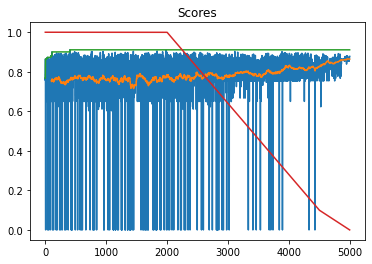

In [54]:
# plot the scores
plot_scores(scores)
import pickle as pickle
with open('scores_lstm_32_nodropout', 'wb') as file:
    pickle.dump(scores, file)
plt.plot(Agent.epsilon_schedule[:5000])

In [61]:
results = pd.DataFrame.from_dict(env.evaluated_models, orient='index', columns = ['Criteria', 'Stdev', 'Inference Time', 'Density', 'FLOPs'])

score_df = pd.DataFrame.from_dict(scores_by_net, columns=['Score'], orient='index')
results = results[['Criteria', 'Density', 'Inference Time', 'FLOPs']].dropna()
results = results.join(score_df)


2186

In [65]:
time/60/60 * 4

4.699439302222222

In [99]:
results_sorted = results.fillna(0).sort_values(['Score'])
results_sorted.tail(10)

Criteria  \
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 3...  [[6.4611713234563e-05, 2.8743969440460204, 0.0...   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 5...  [[0.00016838166510757717, 3.0961024284362795, ...   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 2...  [[0.0006952598944938649, 2.9004926919937133, 0...   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 1...  [[0.0007825809189249053, 2.92874960899353, 0.0...   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 2...  [[2.6282701277631316e-05, 2.873469018936157, 0...   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 5...  [[3.855037833532458e-05, 3.0072362661361693, 0...   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 2...  [[0.0002433883027757861, 3.000666117668152, 0....   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 1...  [[0.00021409342834520983, 2.8953171014785766, ...   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 5...  [[0.00017138610918458335, 2.907788395881653, 0...   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 2...  [[7.907024580890673e-05, 2.8706746816635134, 0...   

                                                     Density  Inference Time  \
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 3...  1.181818        7.148155   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 5...  1.090909        6.478466   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 2...  1.181818        7.717568   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 1...  1.272727        6.813488   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 2...  1.181818        7.371697   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 5...  1.363636        6.578632   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 2...  1.272727        7.111662   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 1...  1.272727        7.526254   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 5...  1.090909        8.540111   
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 2...  1.181818        7.738339   

                                                         FLOPs     Score  
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 3...  24182528.0  0.919480  
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 5...  25716288.0  0.919634  
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 2...  33971264.0  0.920641  
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 1...  23338304.0  0.920960  
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 2...  29917760.0  0.921318  
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 5...  25387776.0  0.921769  
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 2...  27885376.0  0.922747  
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 1...  37288896.0  0.922882  
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 5...  40729280.0  0.923074  
((0, 0, 0, 0, 0), (1, 1, 2, 0, 0, 64), (2, 1, 2...  40267584.0  0.924609

In [93]:
from IPython.display import Image, display

[(0, 0, 0, 0, 0), (1, 1, 1, 0, 0, 128), (2, 1, 1, 0, 0, 128), (3, 1, 8, 1, 0, 256), (4, 2, 5, 1, 0, 0), (5, 1, 3, 3, 0, 256), (6, 1, 2, 4, 0, 128), (7, 1, 3, 5, 0, 128), (8, 4, 0, 0, 0, 0)]


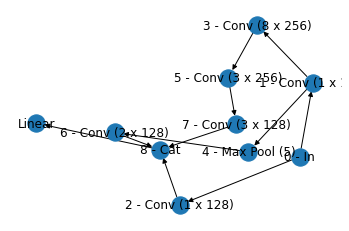

Saving rendered graph to disk.


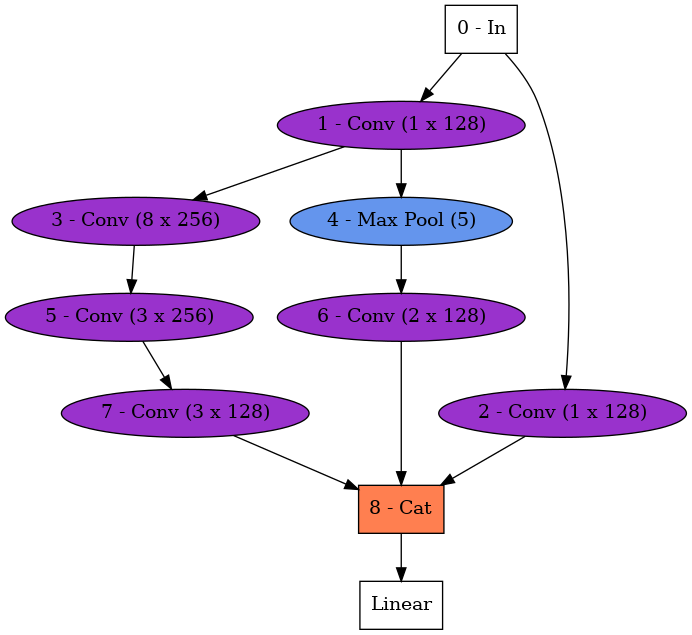

[(0, 0, 0, 0, 0), (1, 1, 1, 0, 0, 32), (2, 1, 5, 1, 0, 64), (3, 1, 3, 0, 0, 64), (4, 1, 5, 3, 0, 256), (5, 1, 5, 4, 0, 128), (6, 1, 5, 4, 0, 128), (7, 1, 8, 4, 0, 256), (8, 1, 8, 7, 0, 128), (9, 4, 0, 0, 0, 0)]


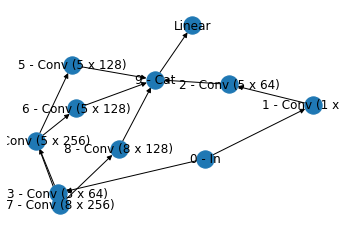

Saving rendered graph to disk.


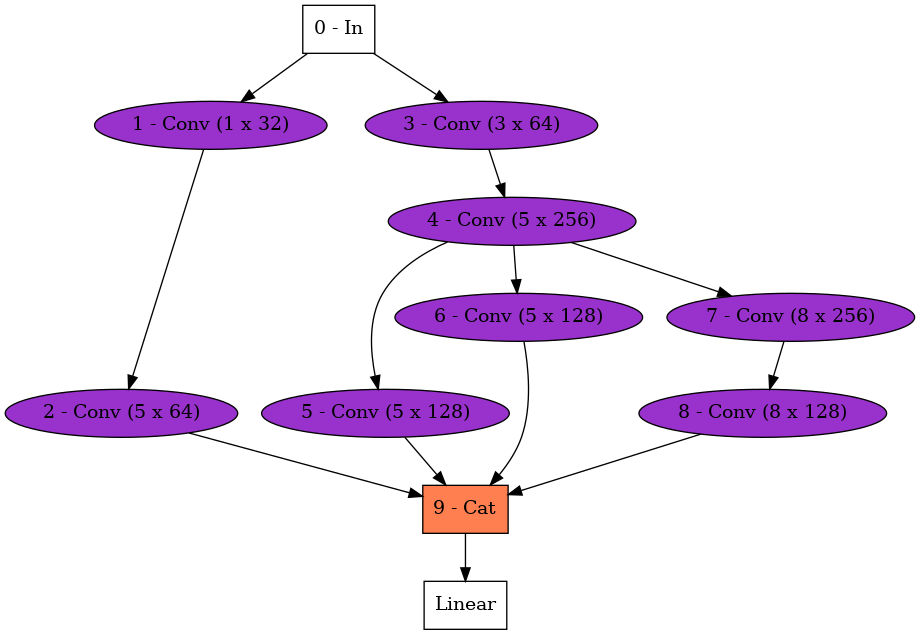

[(0, 0, 0, 0, 0), (1, 1, 1, 0, 0, 256), (2, 1, 1, 0, 0, 256), (3, 1, 3, 1, 0, 256), (4, 1, 2, 3, 0, 256), (5, 3, 0, 4, 0, 0), (6, 3, 0, 4, 0, 0), (7, 1, 5, 3, 0, 256), (8, 1, 5, 3, 0, 256), (9, 4, 0, 0, 0, 0)]


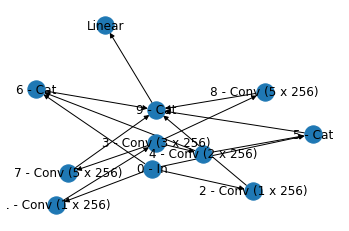

Saving rendered graph to disk.


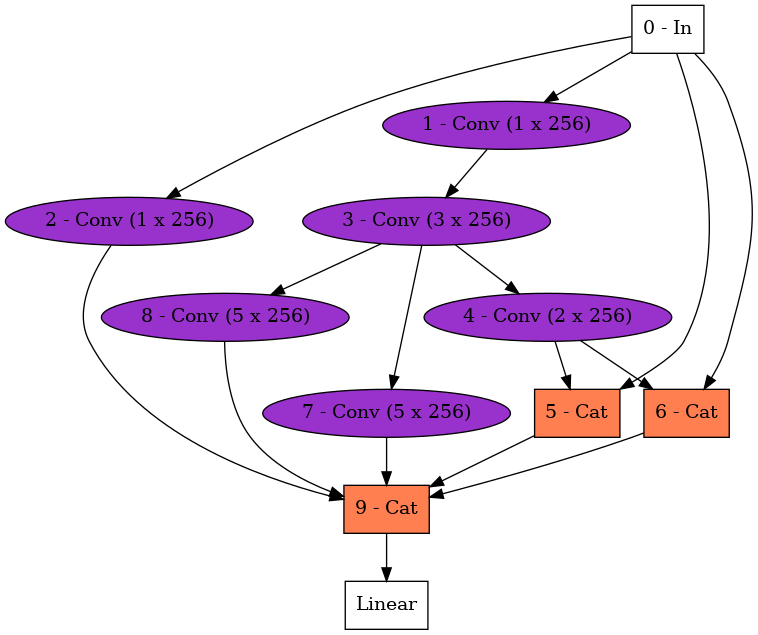

[(0, 0, 0, 0, 0), (1, 1, 1, 0, 0, 256), (2, 1, 8, 1, 0, 64), (3, 1, 1, 1, 0, 256), (4, 1, 1, 1, 0, 256), (5, 1, 1, 1, 0, 256), (6, 2, 3, 0, 0, 0), (7, 1, 8, 1, 0, 128), (8, 1, 8, 1, 0, 128), (9, 4, 0, 0, 0, 0)]


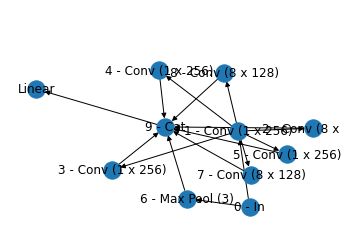

Saving rendered graph to disk.


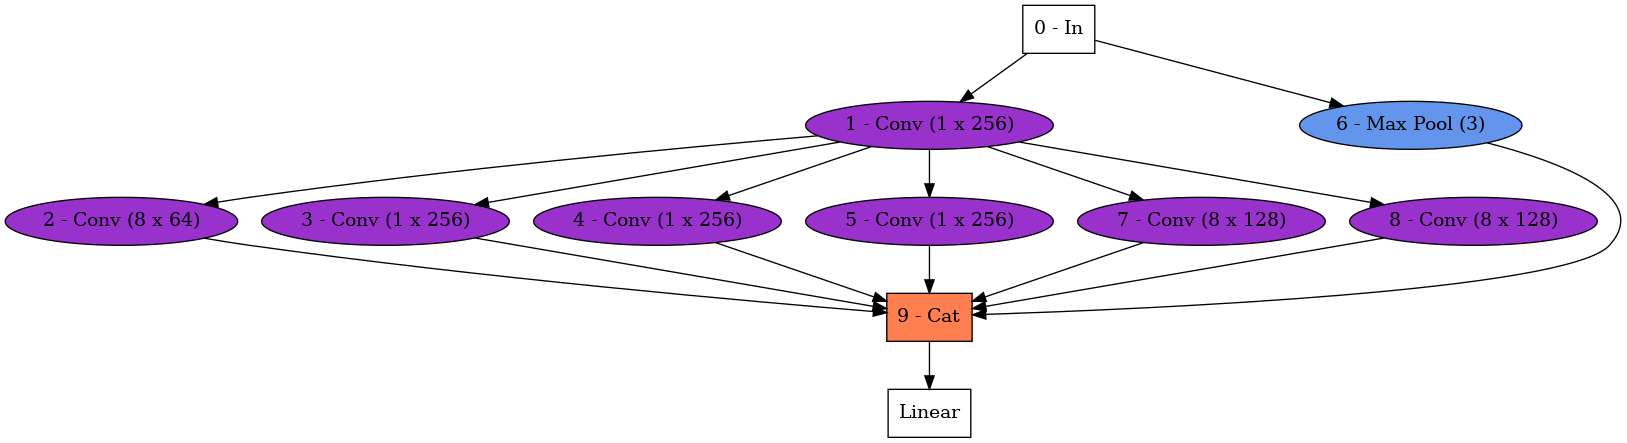

[(0, 0, 0, 0, 0), (1, 1, 1, 0, 0, 128), (2, 1, 1, 0, 0, 128), (3, 1, 8, 1, 0, 256), (4, 1, 1, 1, 0, 256), (5, 2, 5, 0, 0, 0), (6, 1, 8, 3, 0, 64), (7, 1, 8, 3, 0, 64), (8, 1, 8, 3, 0, 64), (9, 4, 0, 0, 0, 0)]


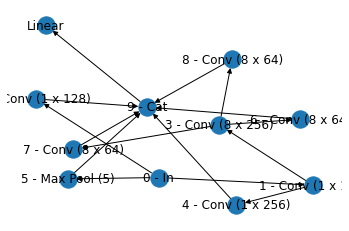

Saving rendered graph to disk.


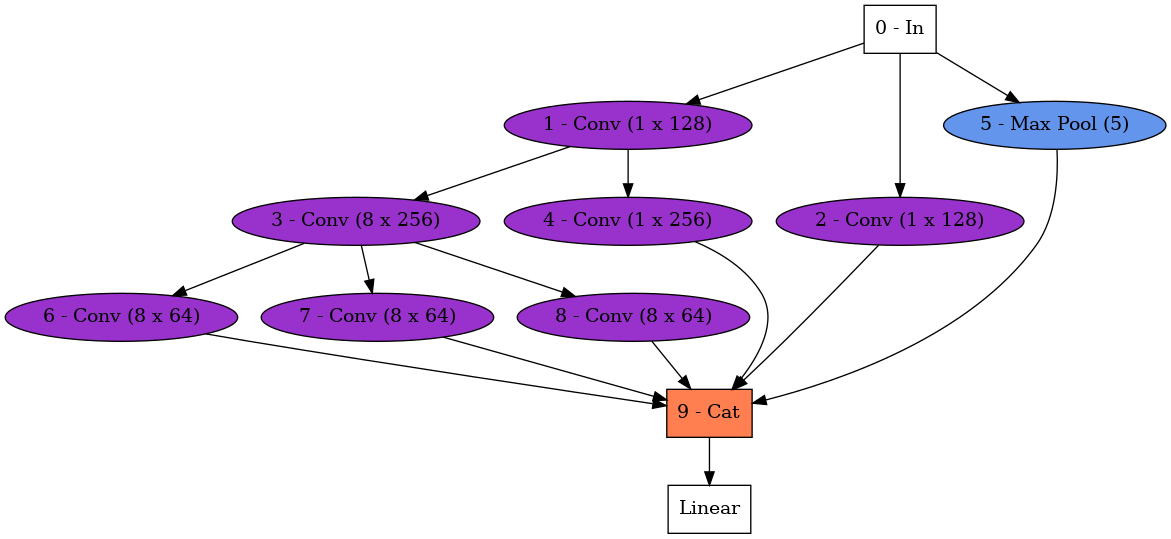

[(0, 0, 0, 0, 0), (1, 1, 1, 0, 0, 256), (2, 1, 1, 0, 0, 32), (3, 1, 1, 0, 0, 32), (4, 1, 5, 3, 0, 256), (5, 1, 1, 0, 0, 32), (6, 1, 8, 1, 0, 256), (7, 1, 8, 4, 0, 256), (8, 1, 8, 7, 0, 128), (9, 4, 0, 0, 0, 0)]


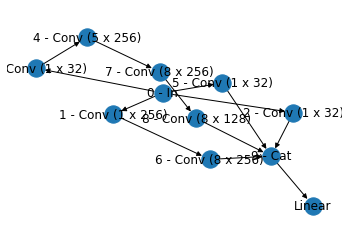

Saving rendered graph to disk.


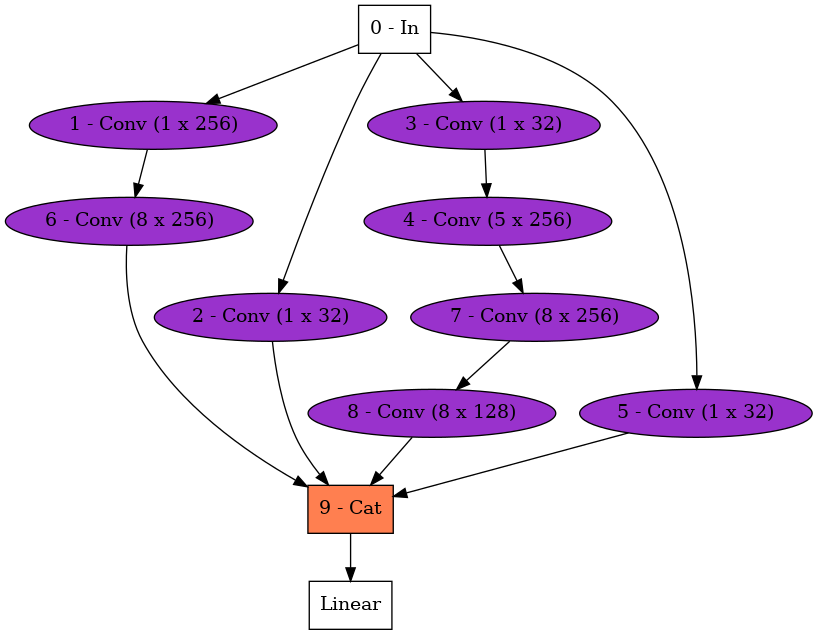

[(0, 0, 0, 0, 0), (1, 1, 1, 0, 0, 256), (2, 1, 1, 1, 0, 256), (3, 1, 5, 1, 0, 256), (4, 1, 5, 1, 0, 256), (5, 1, 5, 1, 0, 256), (6, 1, 5, 1, 0, 256), (7, 1, 5, 1, 0, 256), (8, 1, 8, 3, 0, 32), (9, 4, 0, 0, 0, 0)]


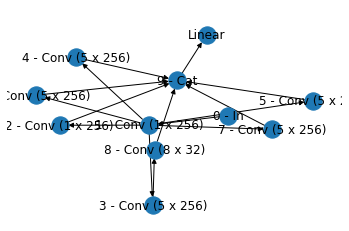

Saving rendered graph to disk.


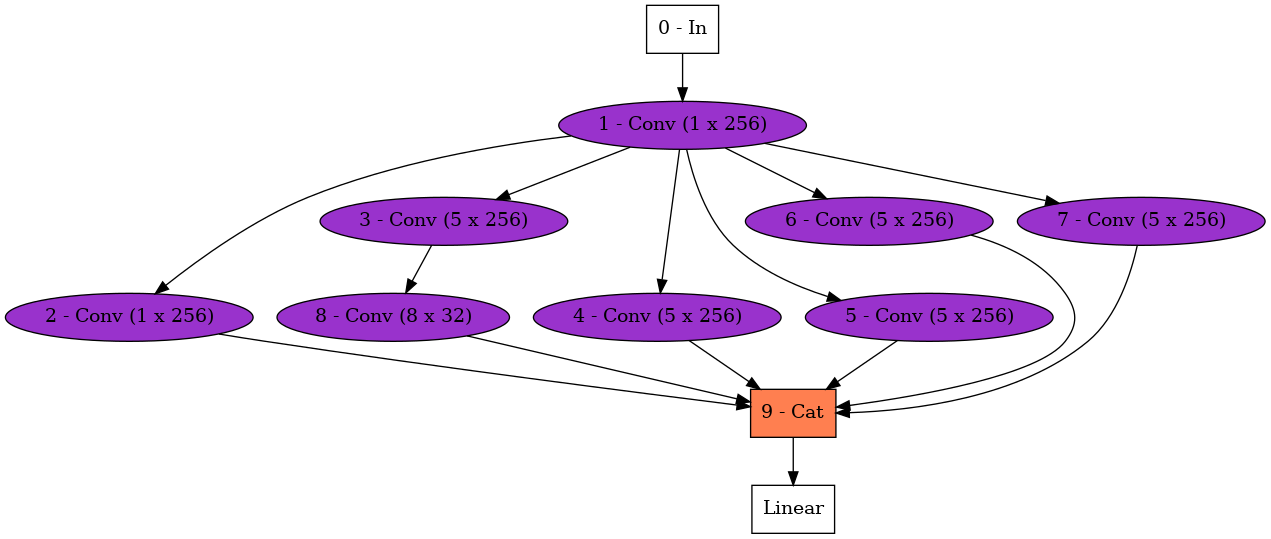

[(0, 0, 0, 0, 0), (1, 1, 1, 0, 0, 256), (2, 1, 2, 1, 0, 256), (3, 1, 2, 1, 0, 256), (4, 1, 1, 0, 0, 64), (5, 1, 1, 2, 0, 128), (6, 1, 8, 2, 0, 256), (7, 1, 3, 1, 0, 128), (8, 1, 8, 7, 0, 128), (9, 4, 0, 0, 0, 0)]


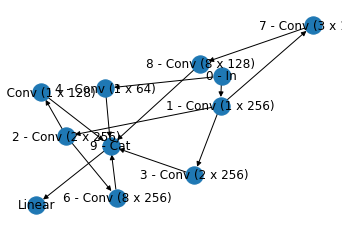

Saving rendered graph to disk.


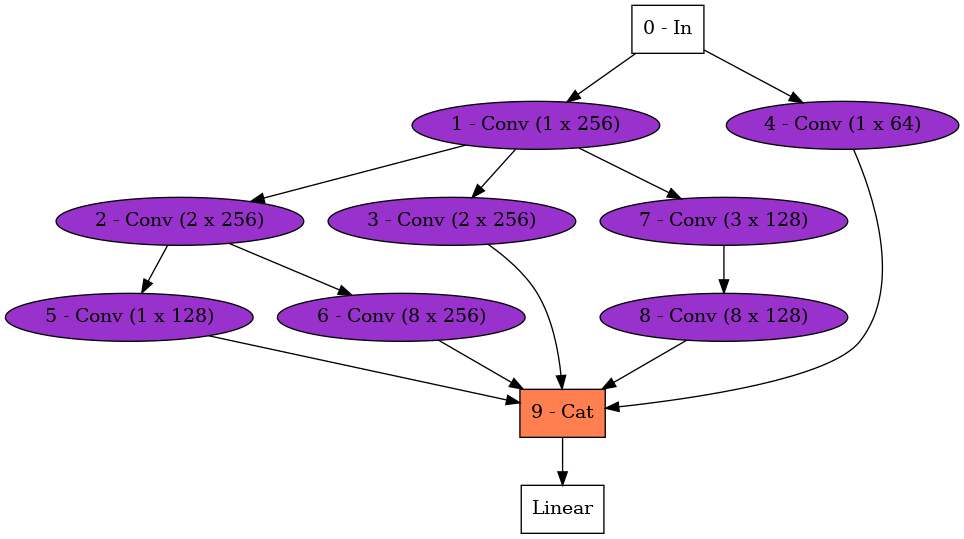

[(0, 0, 0, 0, 0), (1, 1, 1, 0, 0, 256), (2, 1, 1, 1, 0, 256), (3, 1, 1, 1, 0, 256), (4, 1, 3, 2, 0, 256), (5, 1, 2, 4, 0, 128), (6, 1, 8, 4, 0, 256), (7, 1, 3, 4, 0, 32), (8, 1, 8, 7, 0, 128), (9, 4, 0, 0, 0, 0)]


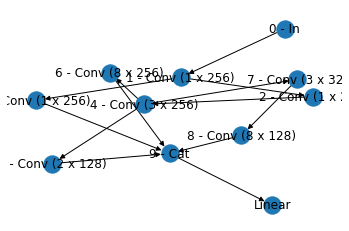

Saving rendered graph to disk.


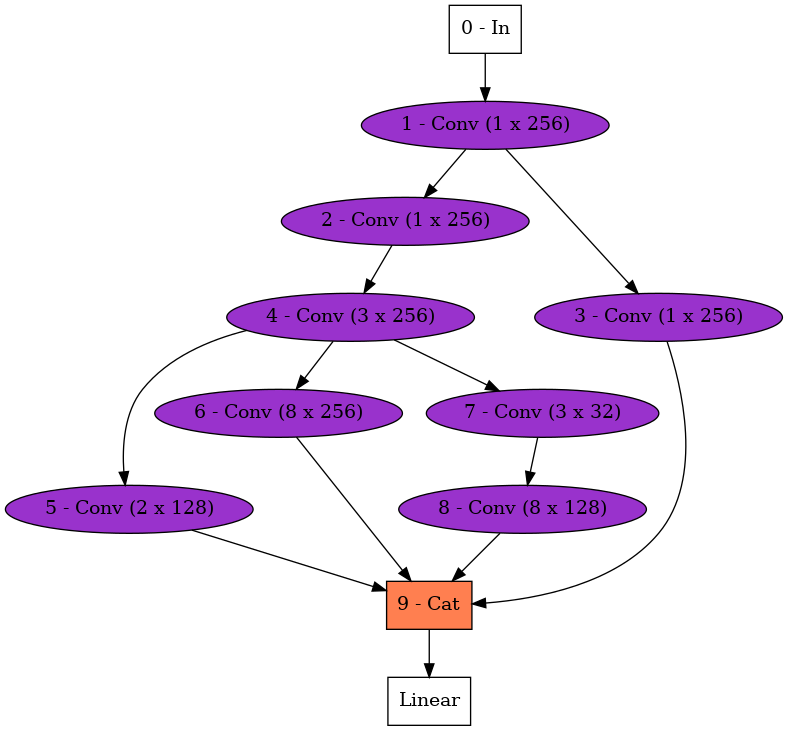

[(0, 0, 0, 0, 0), (1, 2, 3, 0, 0, 0), (2, 1, 1, 0, 0, 256), (3, 1, 3, 1, 0, 256), (4, 2, 3, 2, 0, 0), (5, 1, 1, 2, 0, 128), (6, 1, 2, 5, 0, 256), (7, 1, 2, 4, 0, 128), (8, 1, 8, 7, 0, 128), (9, 4, 0, 0, 0, 0)]


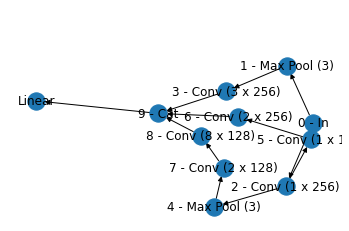

Saving rendered graph to disk.


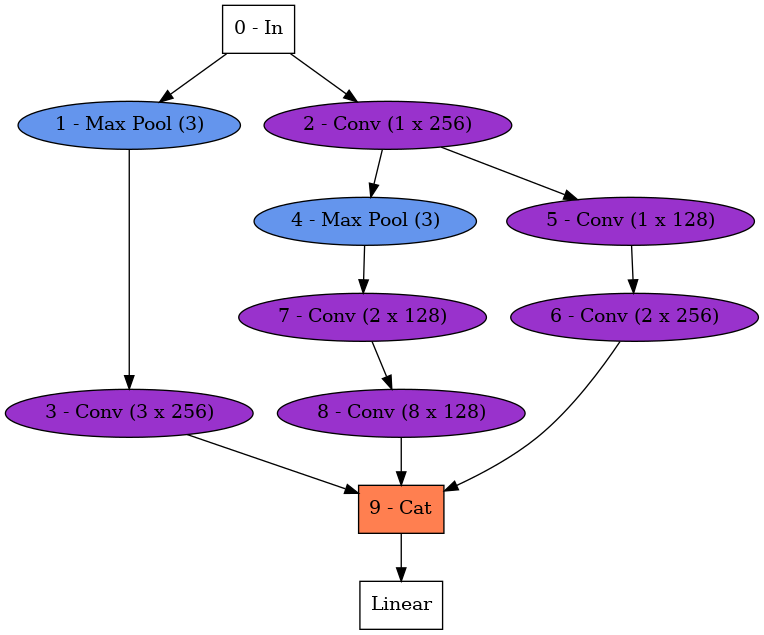

In [35]:
for i in range(10):
    best_model = [obj for obj in results_sorted.tail(10).index[i]]
    print(best_model)
    best_model = env.get_spec(best_model)
    env.render(best_model, ftype='png')

    display(Image(filename='output.png'))

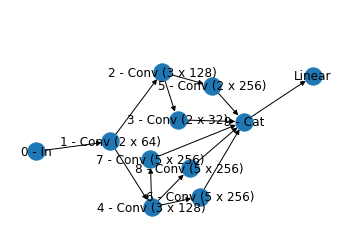

Saving rendered graph to disk.


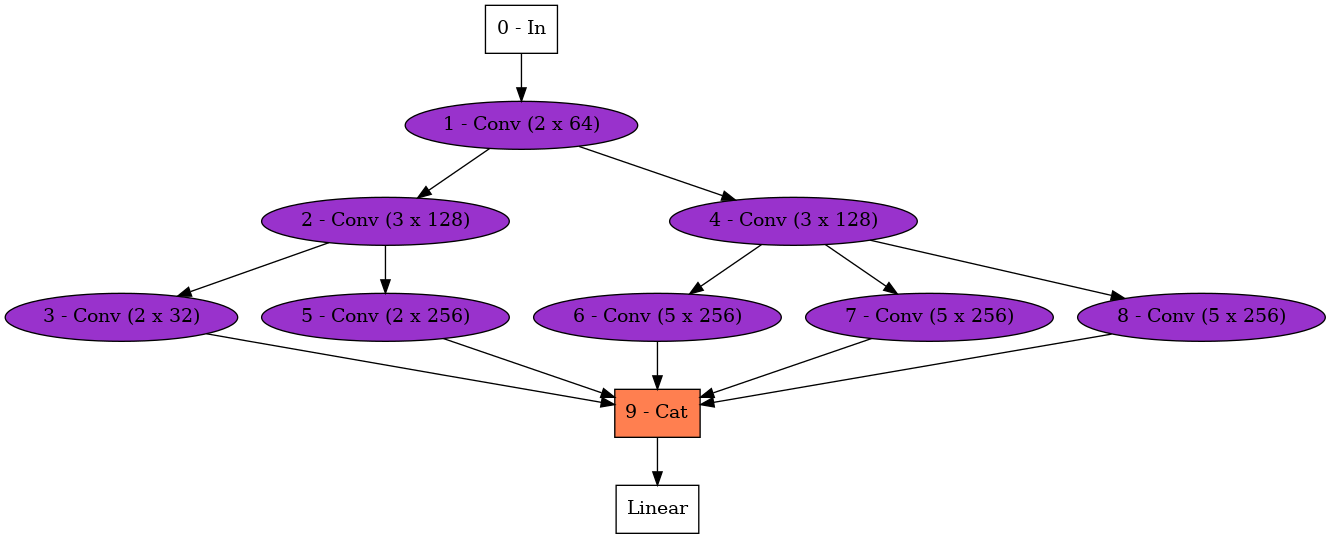

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[None None None]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[None None None]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[None None None]
  [None None None]
  [Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


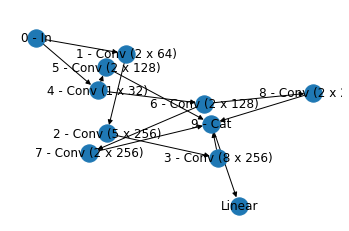

Saving rendered graph to disk.


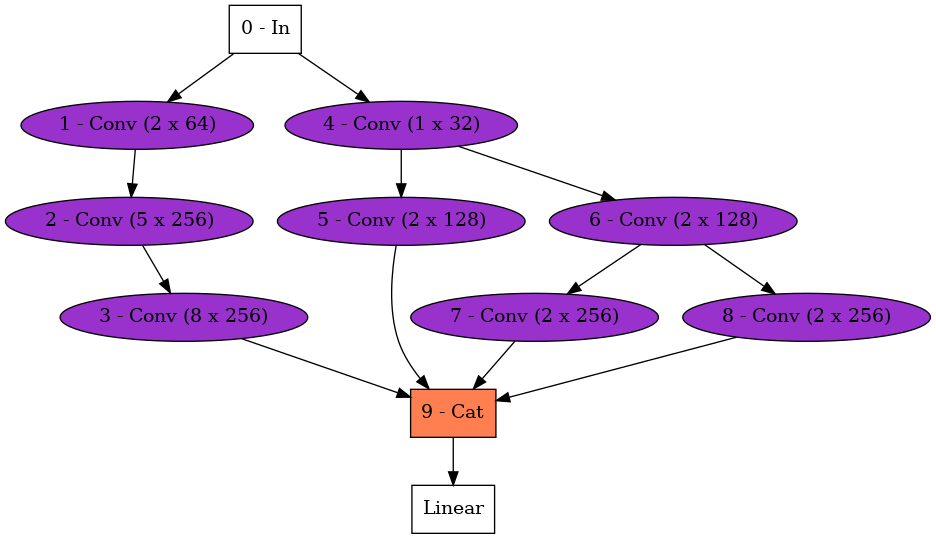

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[None None None]
  [None None None]
  [None None None]
  [None None None]
  [None None

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


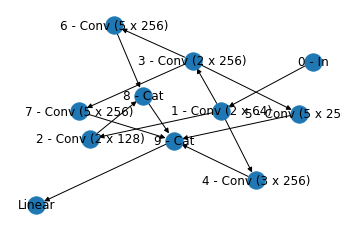

Saving rendered graph to disk.


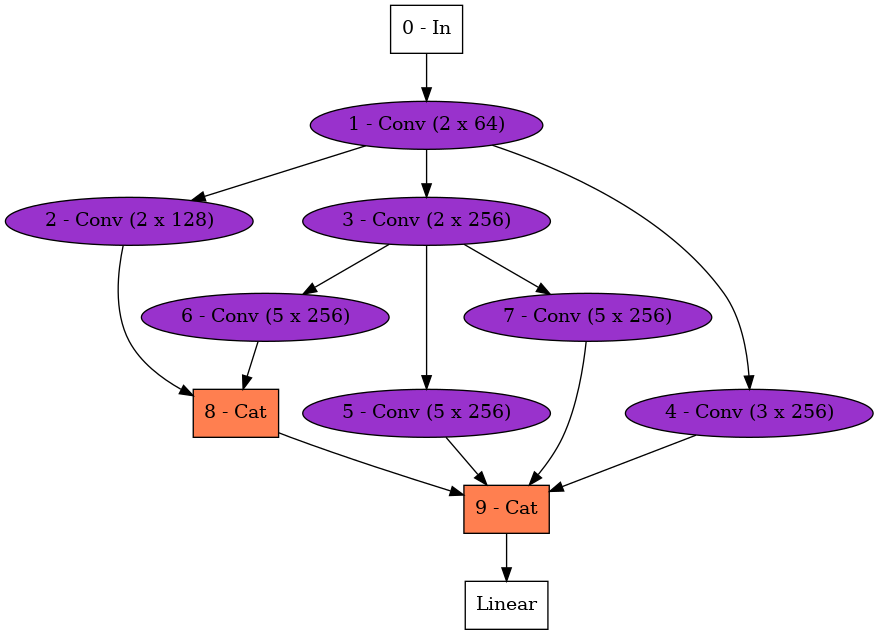

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.8927, 0.8942029424201077, 0.5956924088532554) 33971264.0 1.62694]
  [None None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


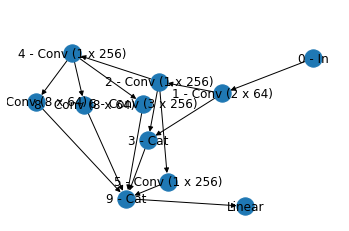

Saving rendered graph to disk.


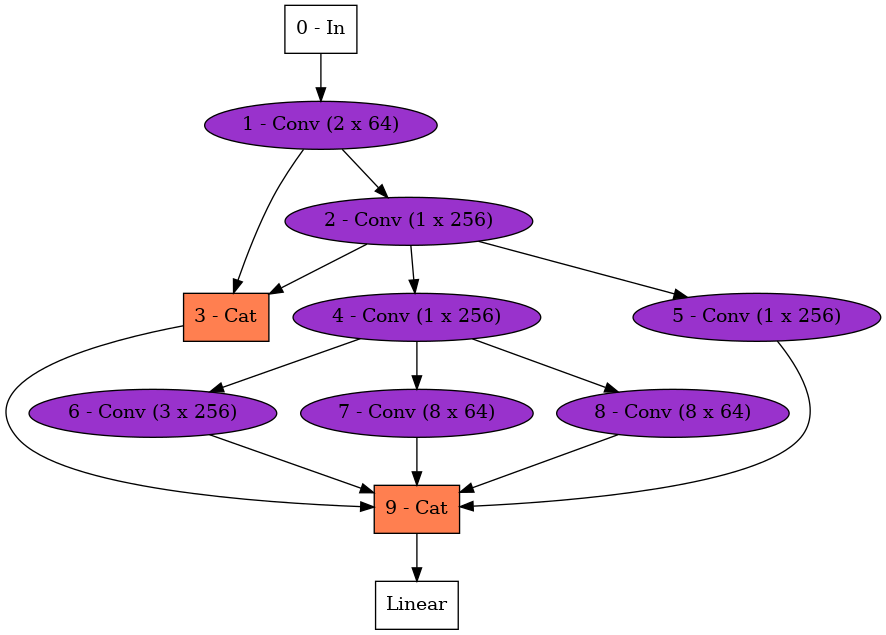

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.8927, 0.8942029424201077, 0.5956924088532554) 33971264.0 1.62694]
  [None None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


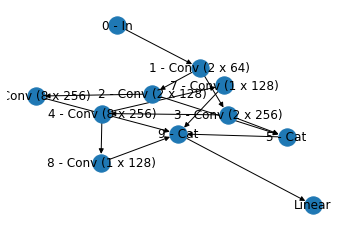

Saving rendered graph to disk.


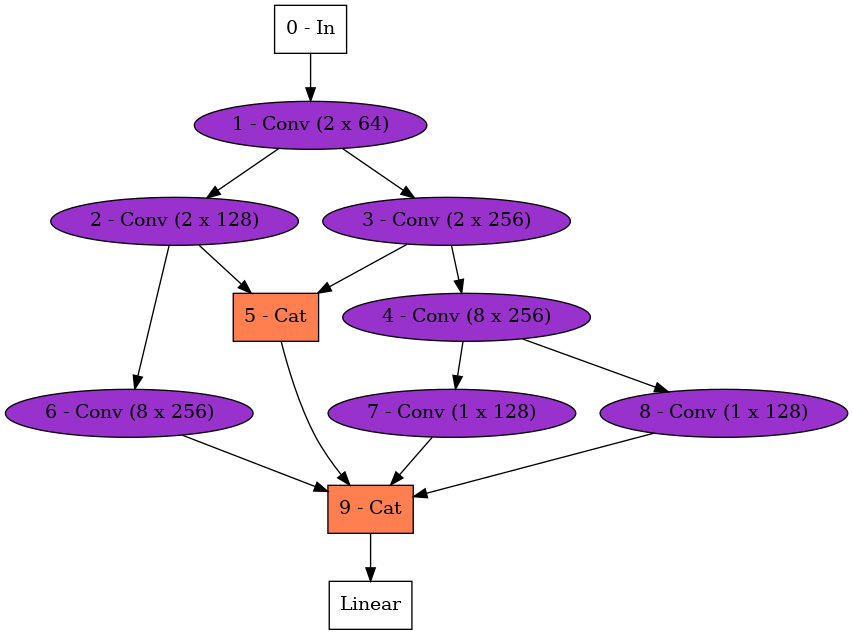

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.8927, 0.8942029424201077, 0.5956924088532554) 33971264.0 1.62694]
  [None None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


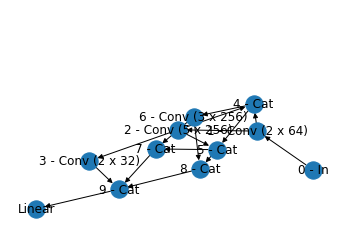

Saving rendered graph to disk.


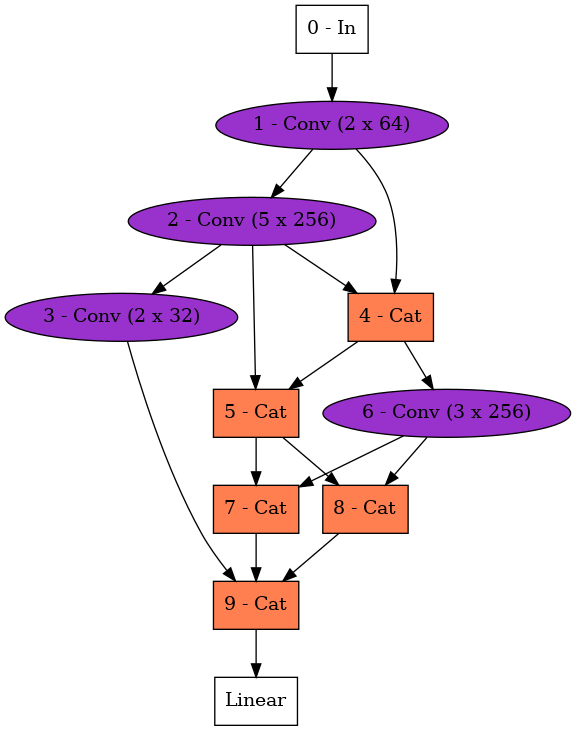

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.8927, 0.8942029424201077, 0.5956924088532554) 33971264.0 1.62694]
  [None None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


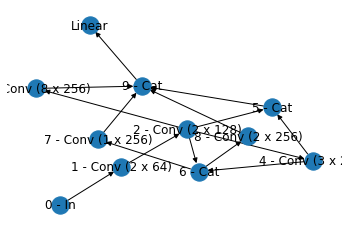

Saving rendered graph to disk.


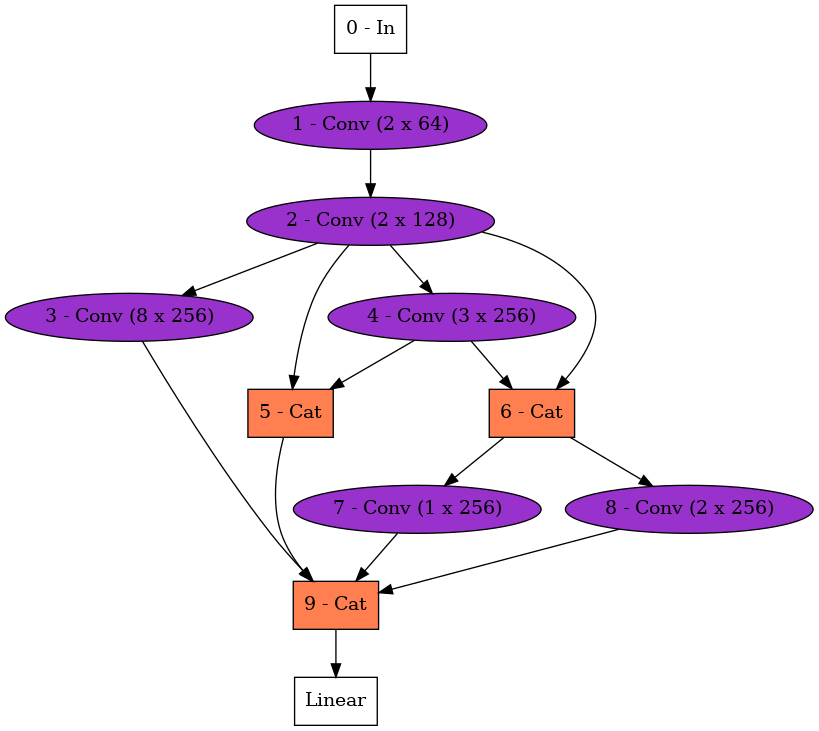

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.8927, 0.8942029424201077, 0.5956924088532554) 33971264.0 1.62694]
  [None None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


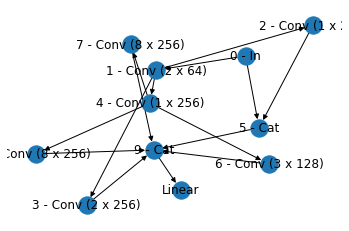

Saving rendered graph to disk.


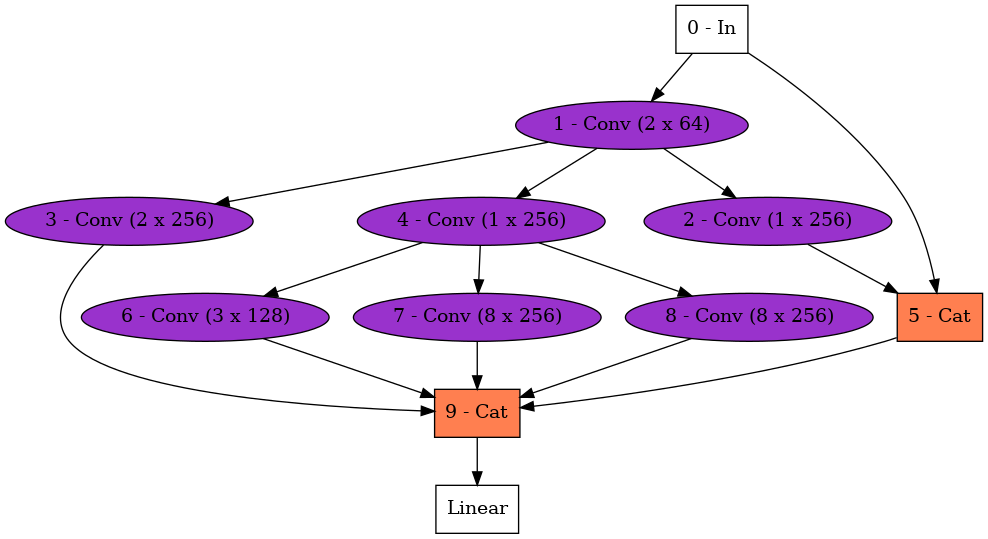

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.8927, 0.8942029424201077, 0.5956924088532554) 33971264.0 1.62694]
  [None None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


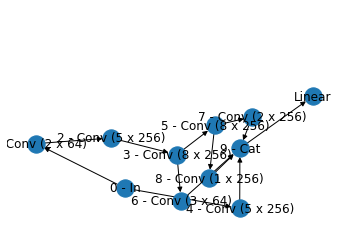

Saving rendered graph to disk.


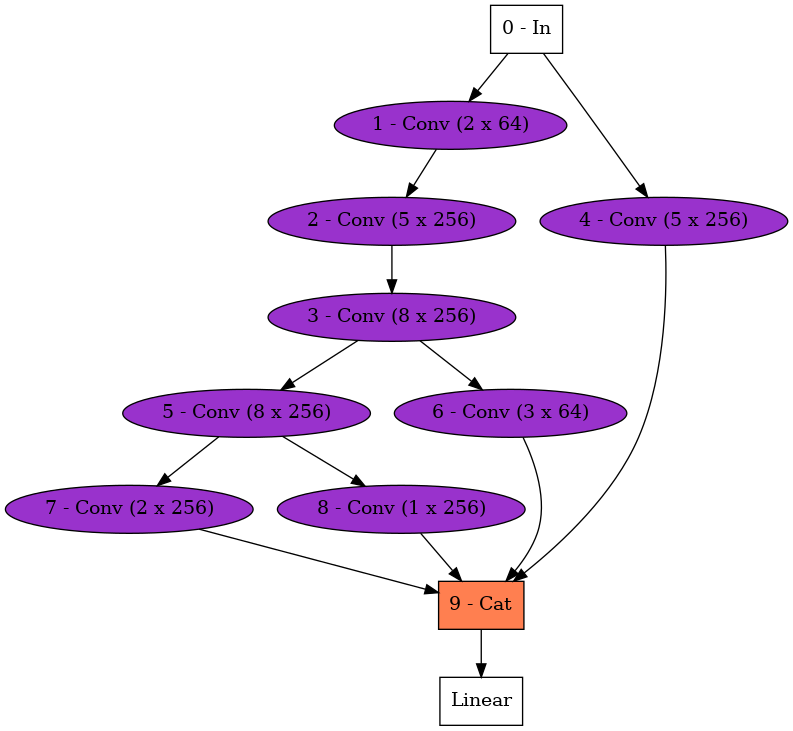

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.8927, 0.8942029424201077, 0.5956924088532554) 33971264.0 1.62694]
  [None None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


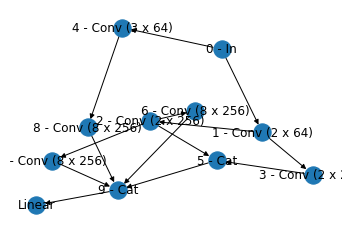

Saving rendered graph to disk.


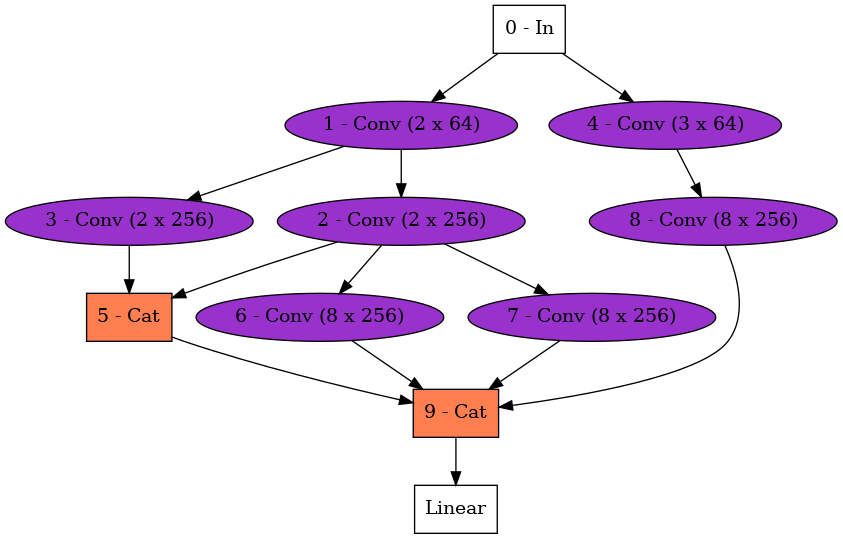

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.8927, 0.8942029424201077, 0.5956924088532554) 33971264.0 1.62694]
  [None None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


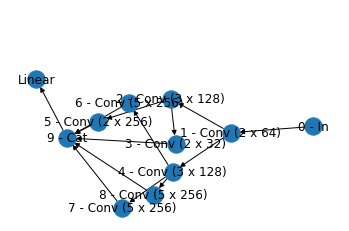

Saving rendered graph to disk.


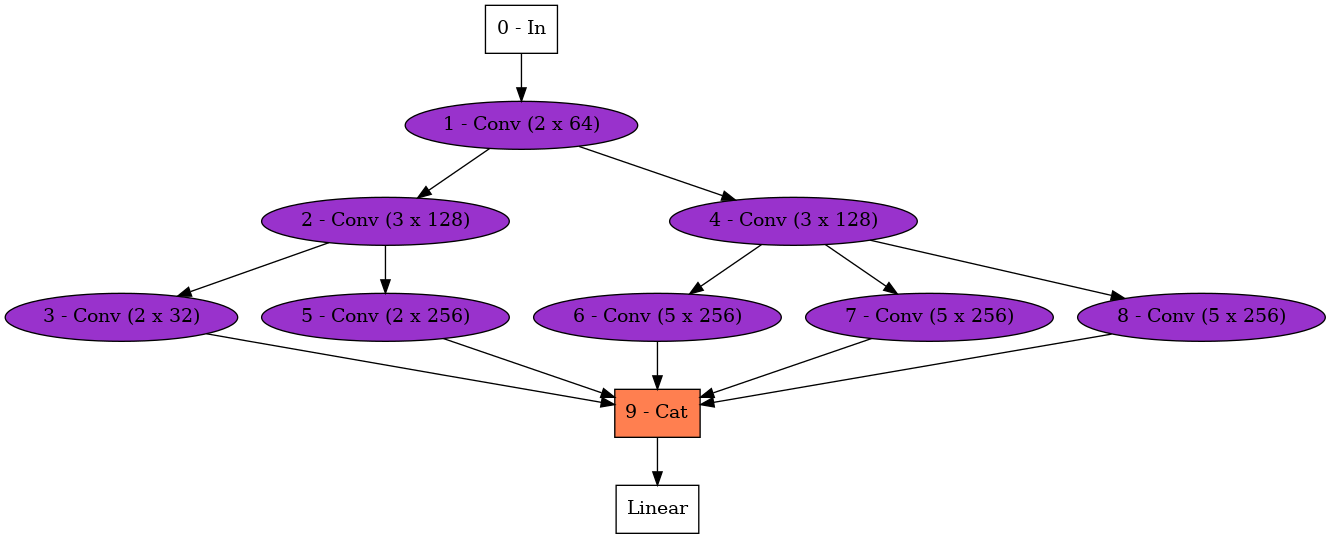

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [None None None]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.8927, 0.894202

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


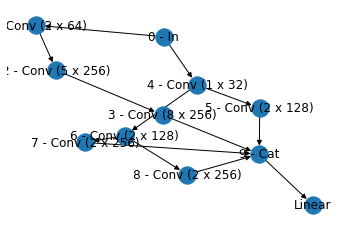

Saving rendered graph to disk.


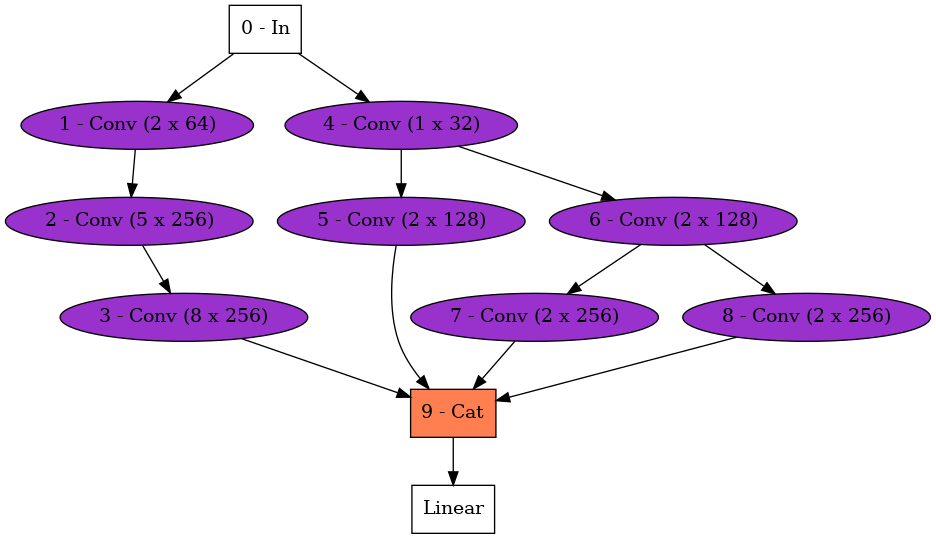

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.8951952501635702, 0.595408751899251)
   25716288.0 1.399693]
  [None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


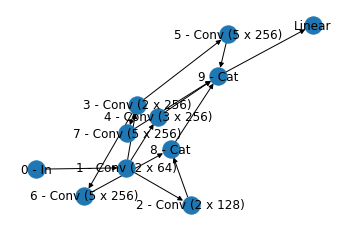

Saving rendered graph to disk.


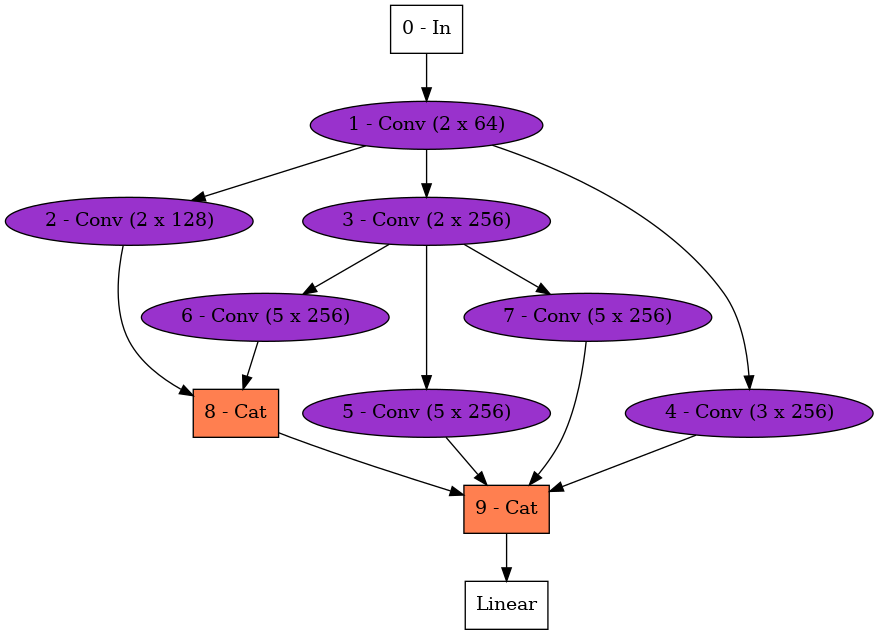

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.8951952501635702, 0.595408751899251)
   25716288.0 1.399693]
  [None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


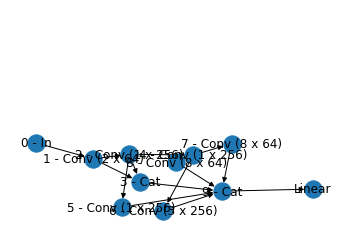

Saving rendered graph to disk.


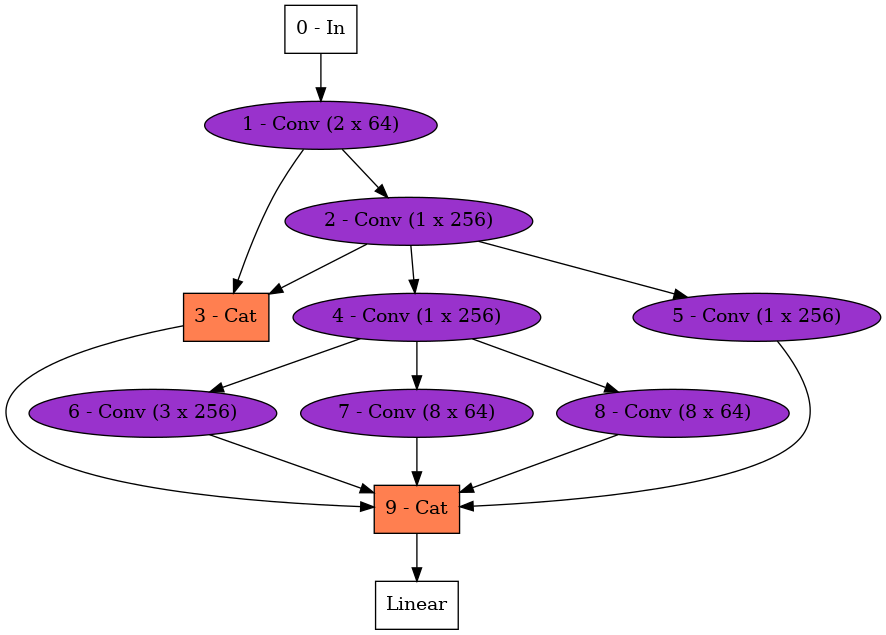

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.8951952501635702, 0.595408751899251)
   25716288.0 1.399693]
  [None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


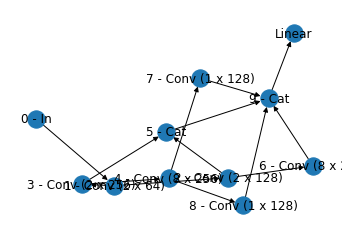

Saving rendered graph to disk.


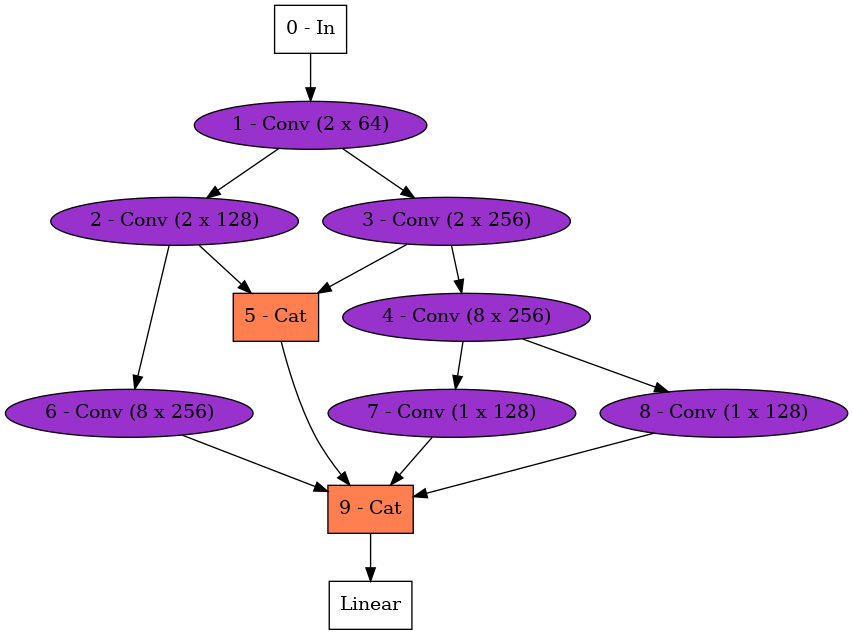

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.8951952501635702, 0.595408751899251)
   25716288.0 1.399693]
  [None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


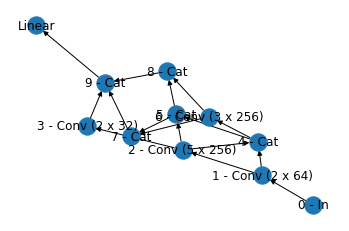

Saving rendered graph to disk.


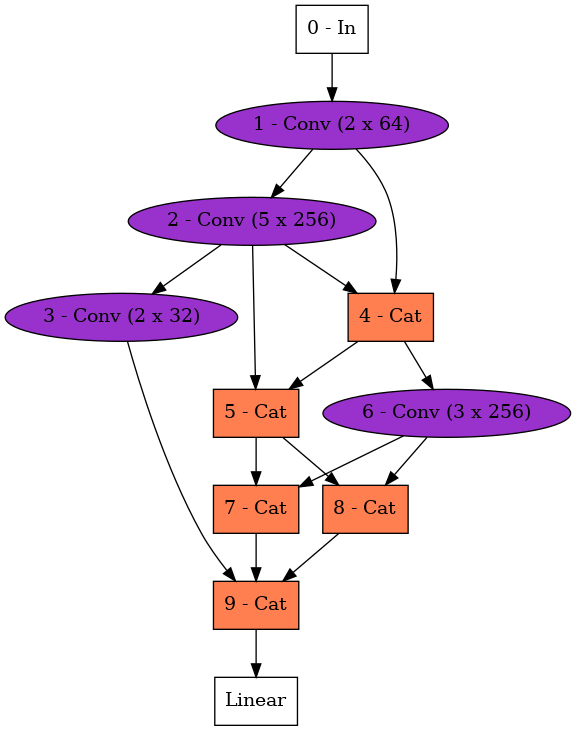

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.8951952501635702, 0.595408751899251)
   25716288.0 1.399693]
  [None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


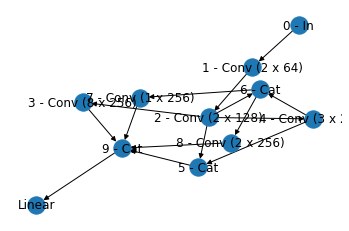

Saving rendered graph to disk.


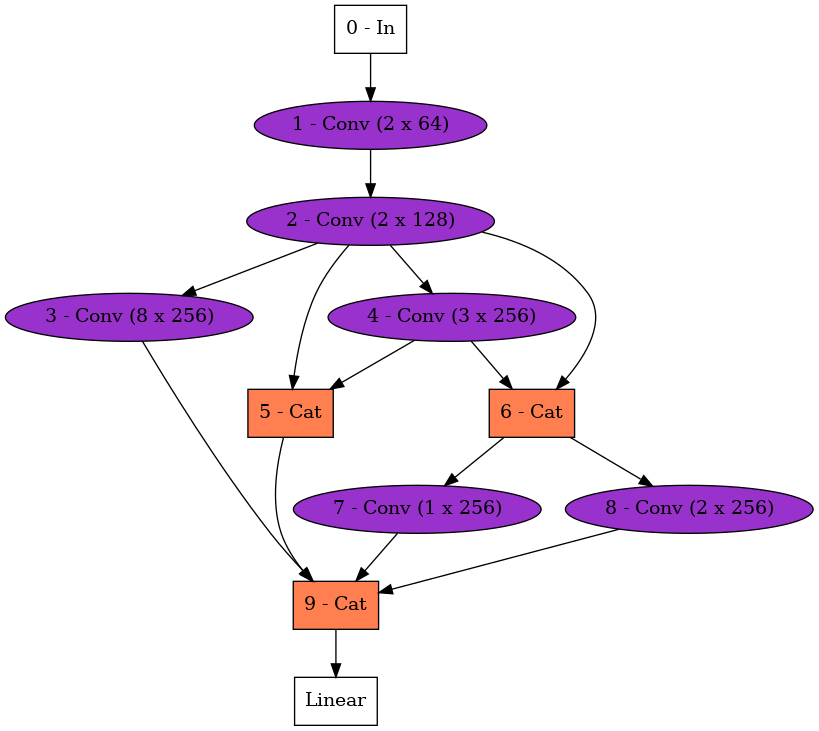

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.8951952501635702, 0.595408751899251)
   25716288.0 1.399693]
  [None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


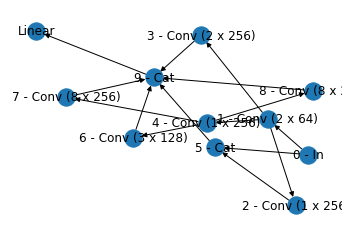

Saving rendered graph to disk.


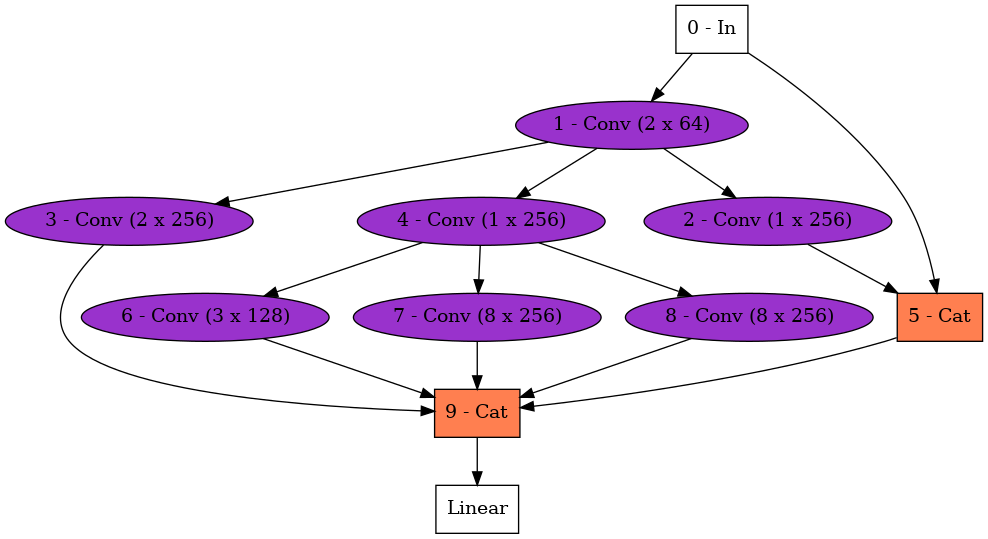

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.8951952501635702, 0.595408751899251)
   25716288.0 1.399693]
  [None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


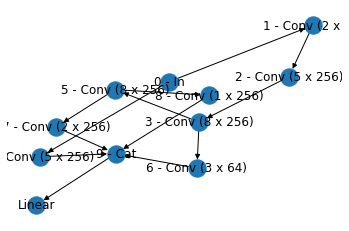

Saving rendered graph to disk.


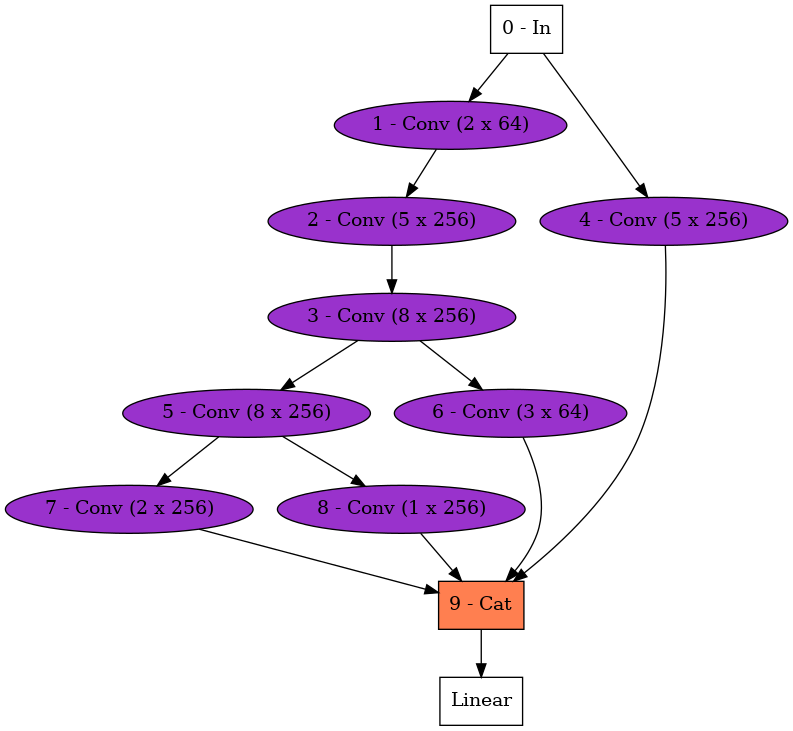

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.8951952501635702, 0.595408751899251)
   25716288.0 1.399693]
  [None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


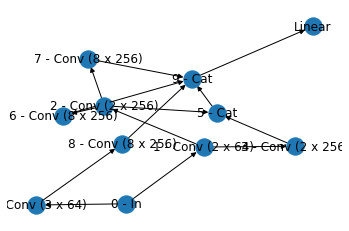

Saving rendered graph to disk.


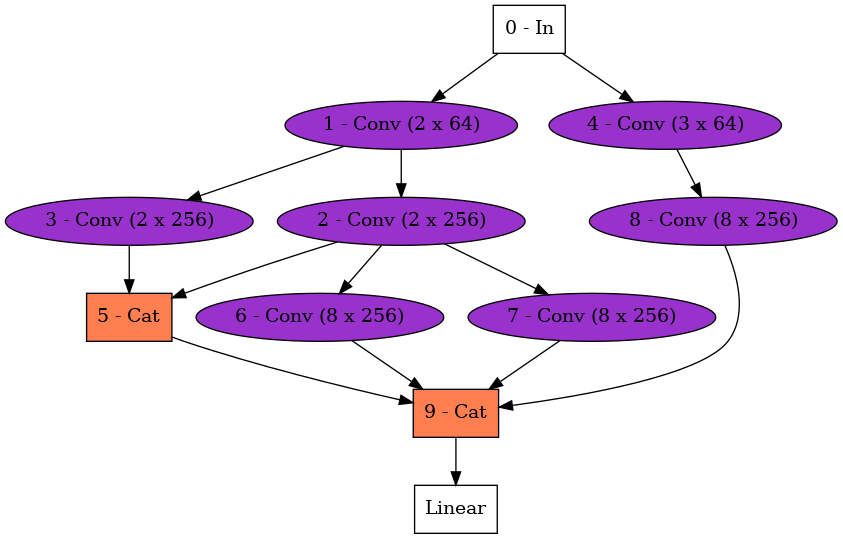

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [None None None]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.8951952501635702, 0.595408751899251)
   25716288.0 1.399693]
  [None Non

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


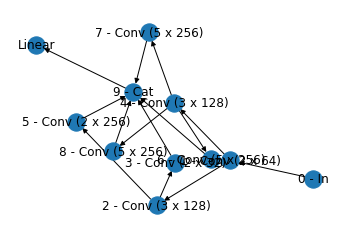

Saving rendered graph to disk.


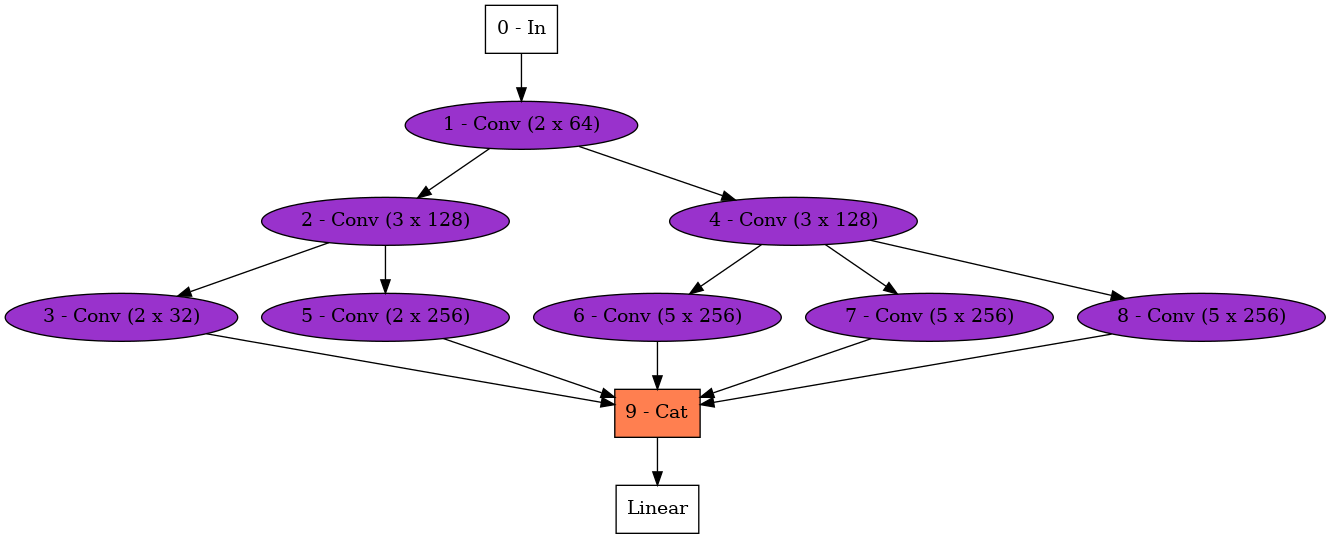

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.895

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


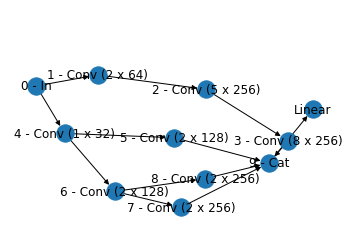

Saving rendered graph to disk.


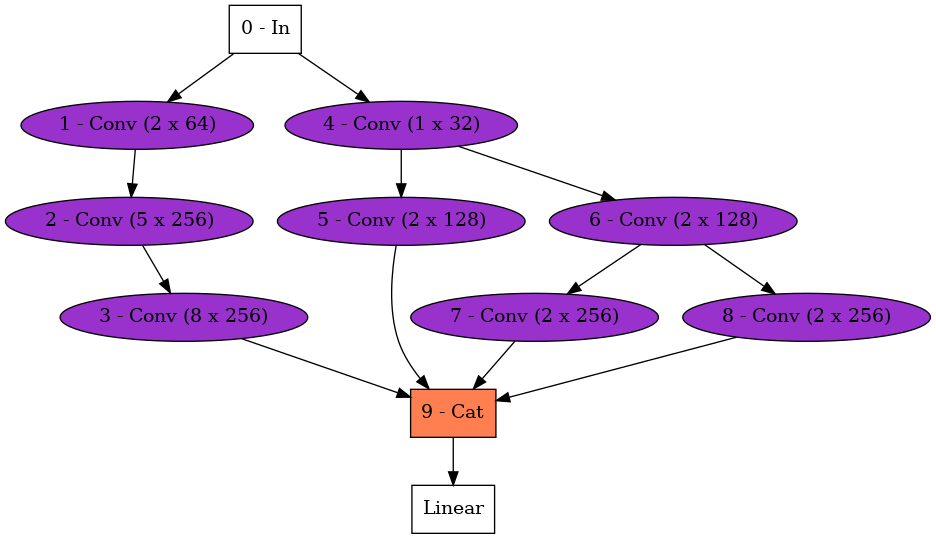

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.895

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


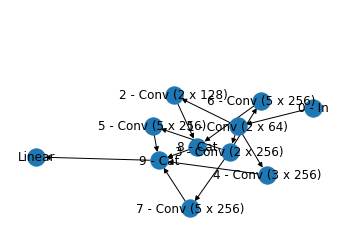

Saving rendered graph to disk.


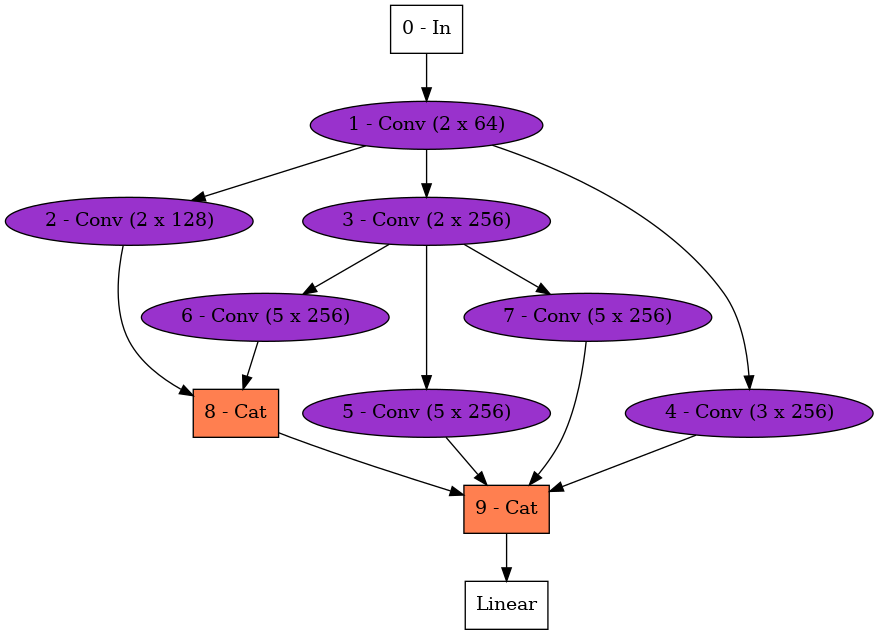

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.895

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


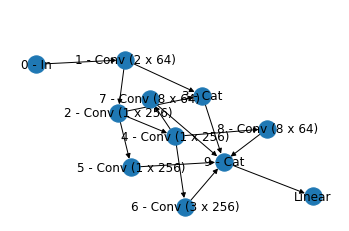

Saving rendered graph to disk.


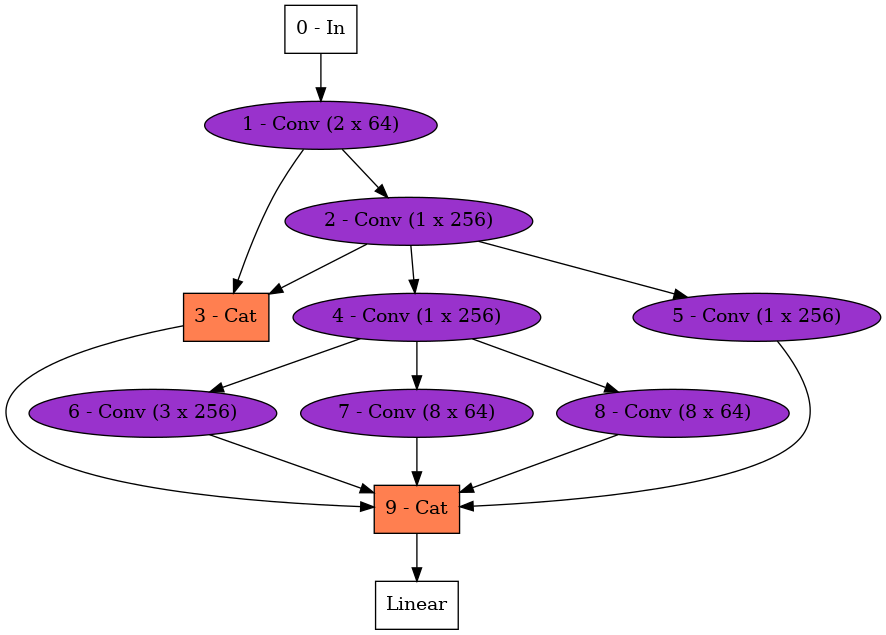

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.895

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


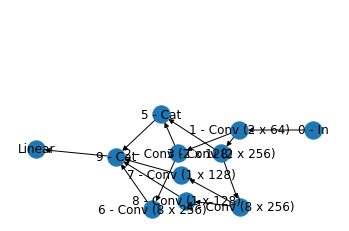

Saving rendered graph to disk.


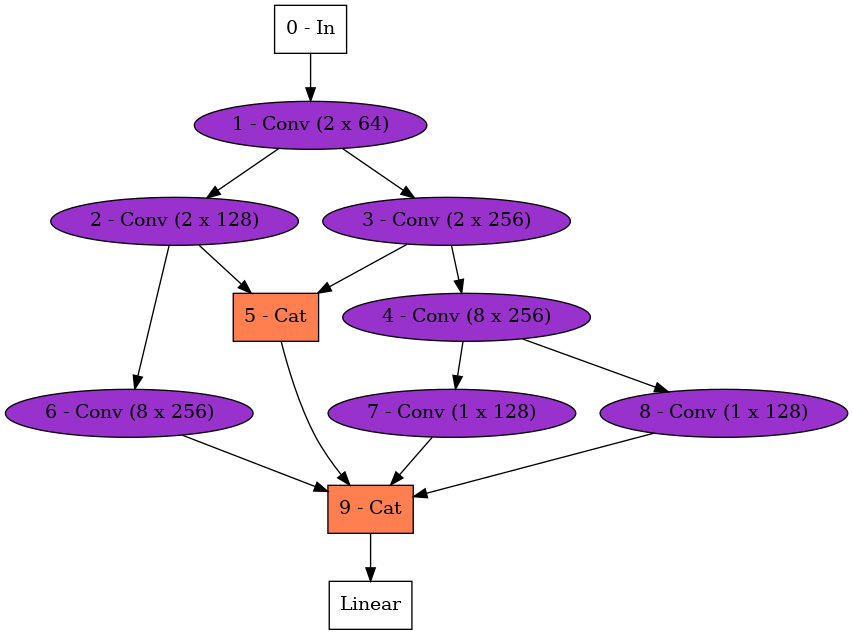

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.895

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


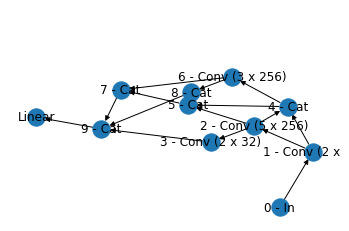

Saving rendered graph to disk.


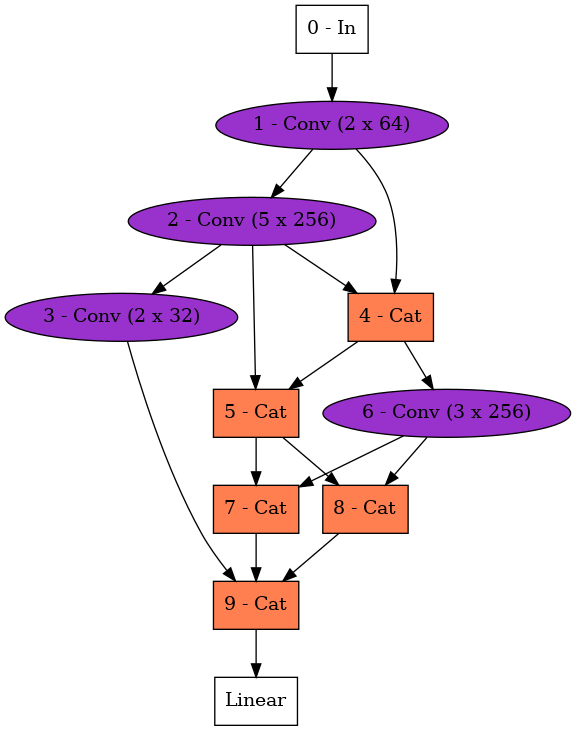

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.895

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


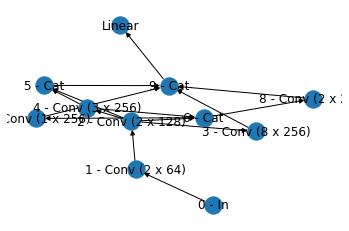

Saving rendered graph to disk.


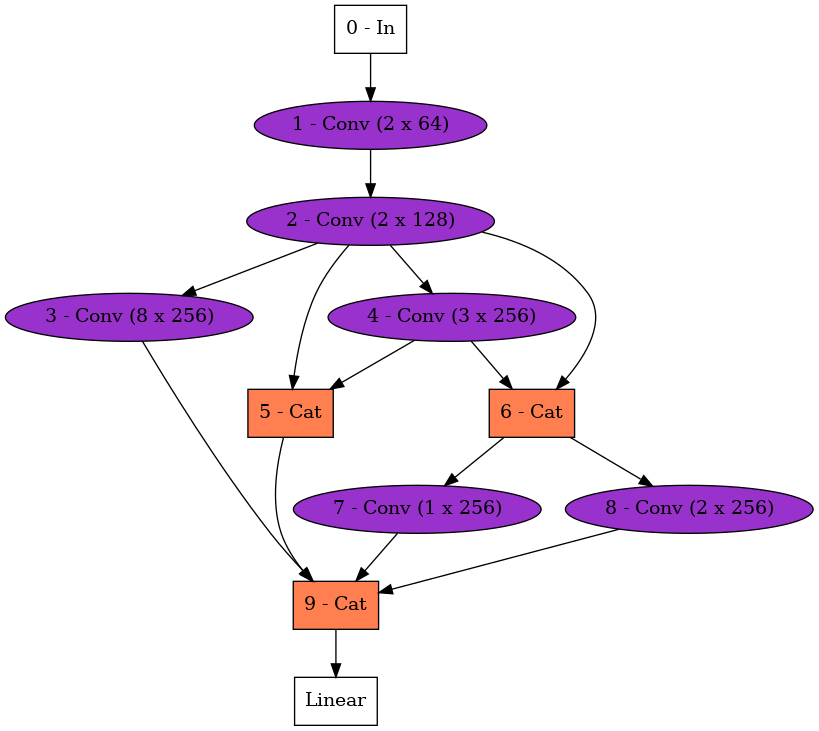

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.895

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


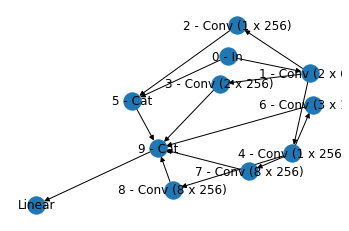

Saving rendered graph to disk.


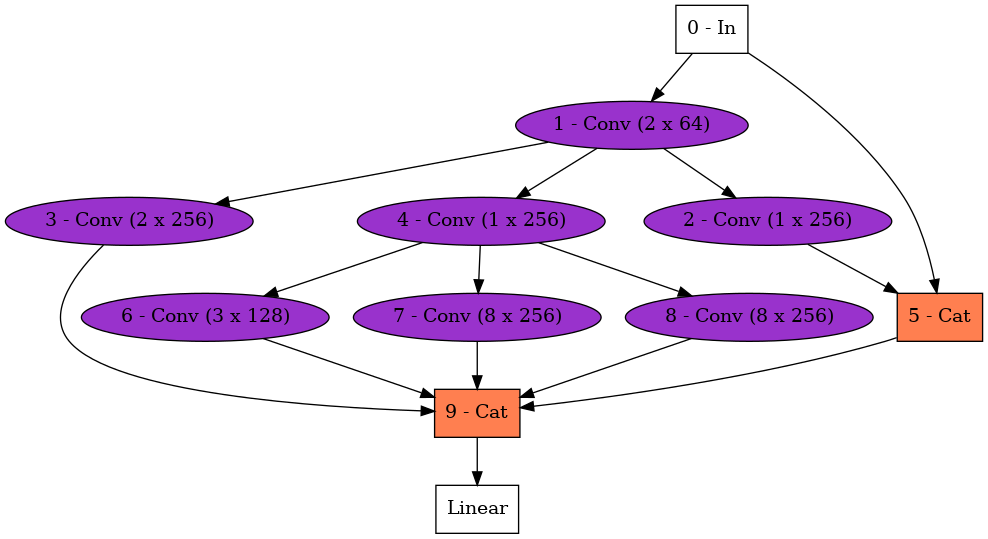

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.895

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


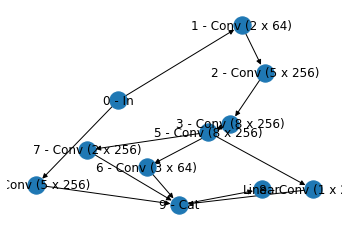

Saving rendered graph to disk.


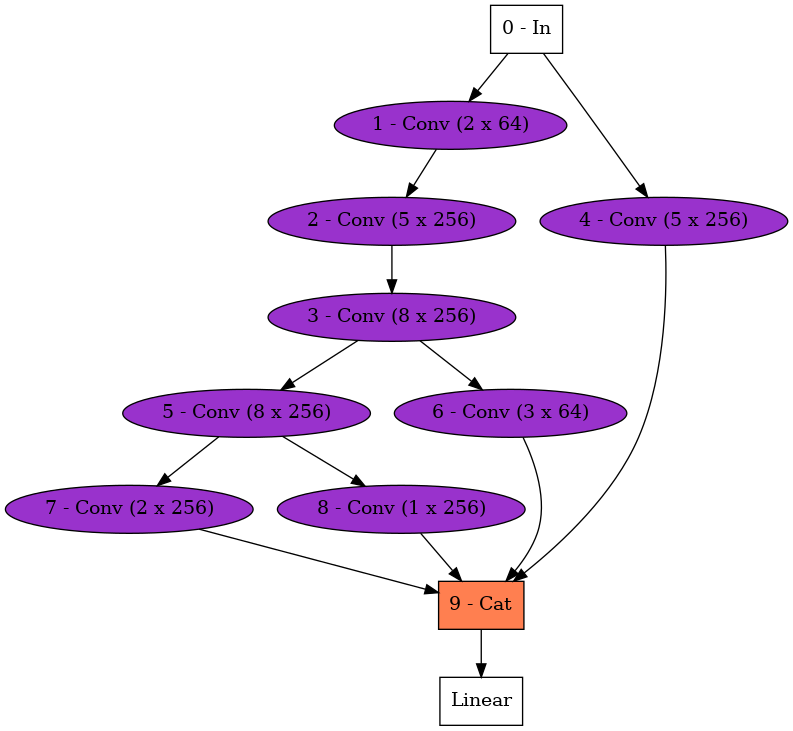

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.895

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


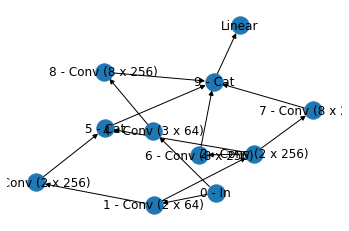

Saving rendered graph to disk.


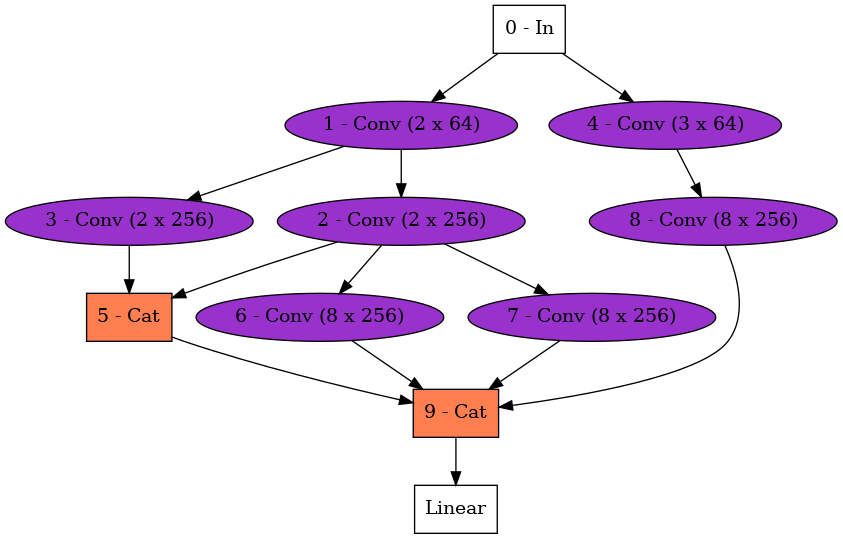

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [None None None]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0.5698061918060916) 25716288.0 1.407026]
  [(0.8936714285714286, 0.895

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


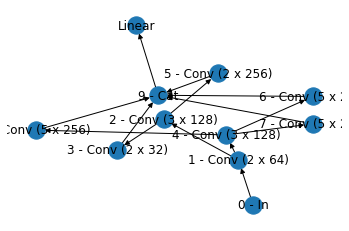

Saving rendered graph to disk.


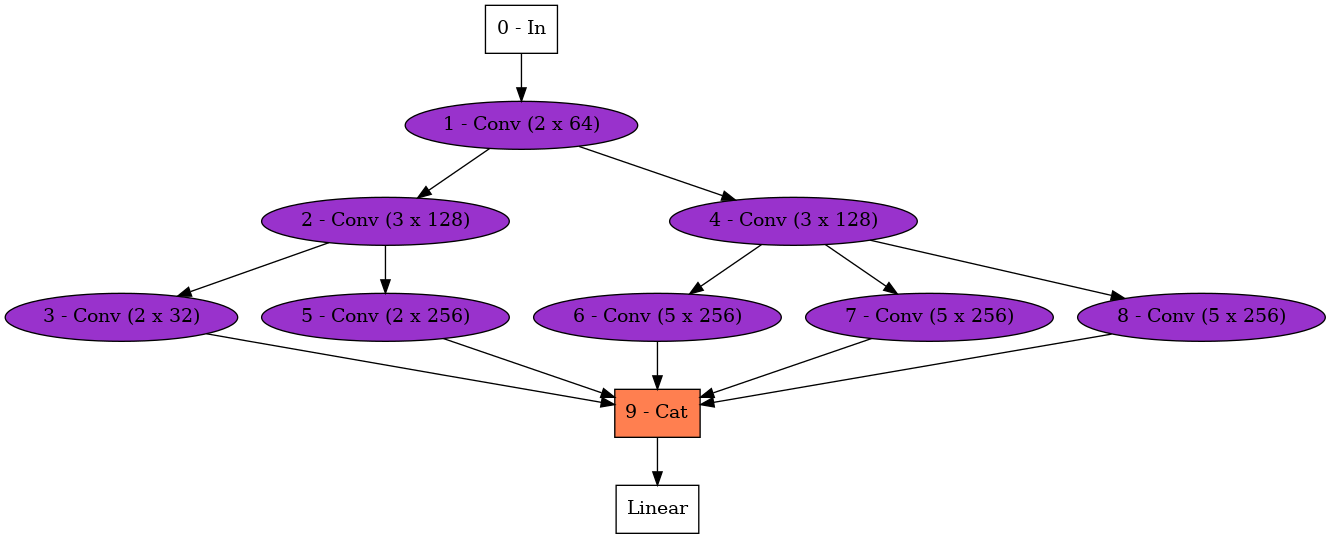

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


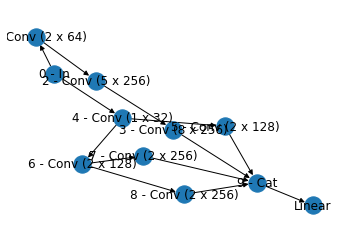

Saving rendered graph to disk.


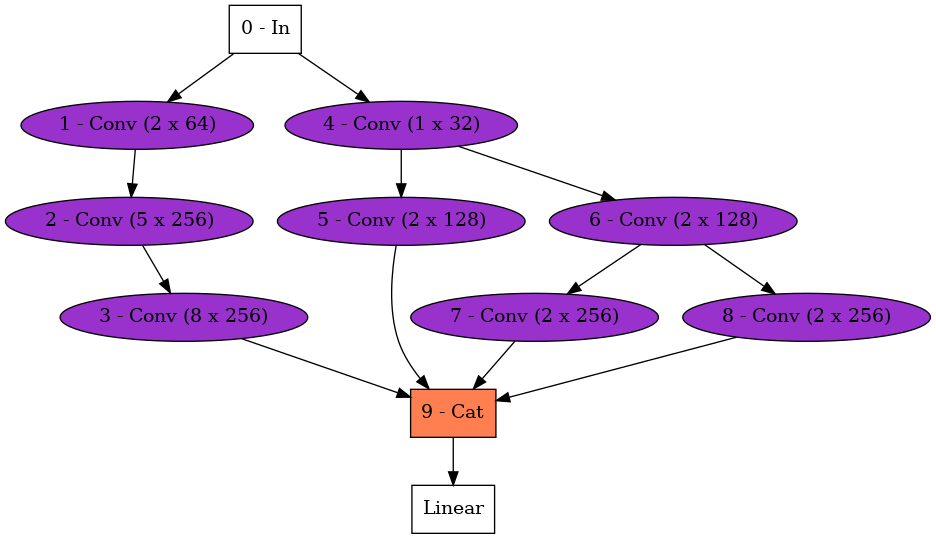

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


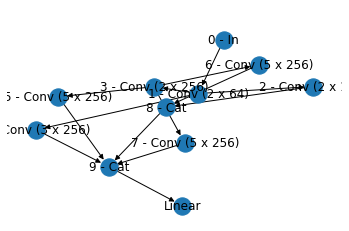

Saving rendered graph to disk.


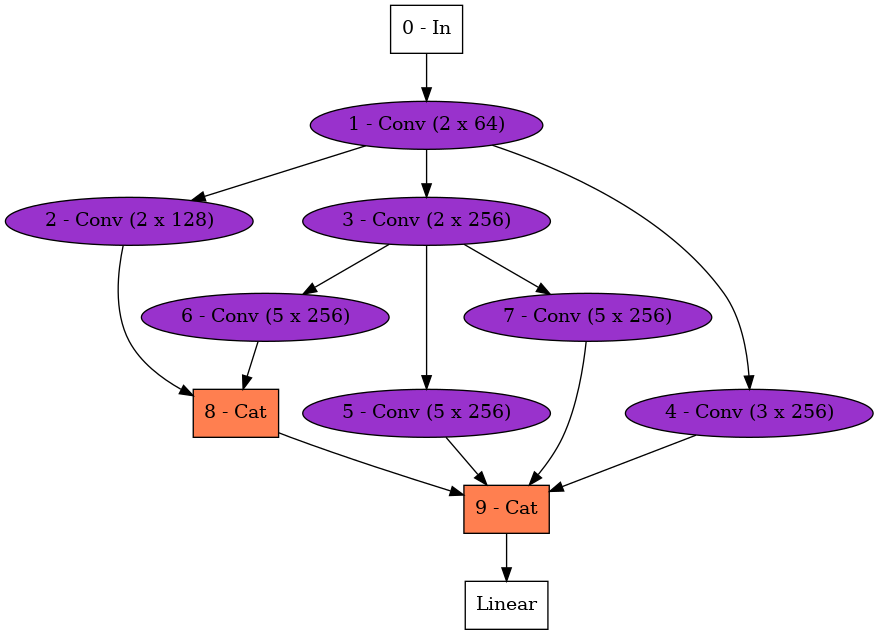

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


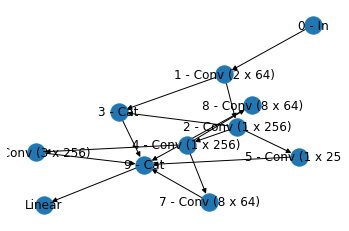

Saving rendered graph to disk.


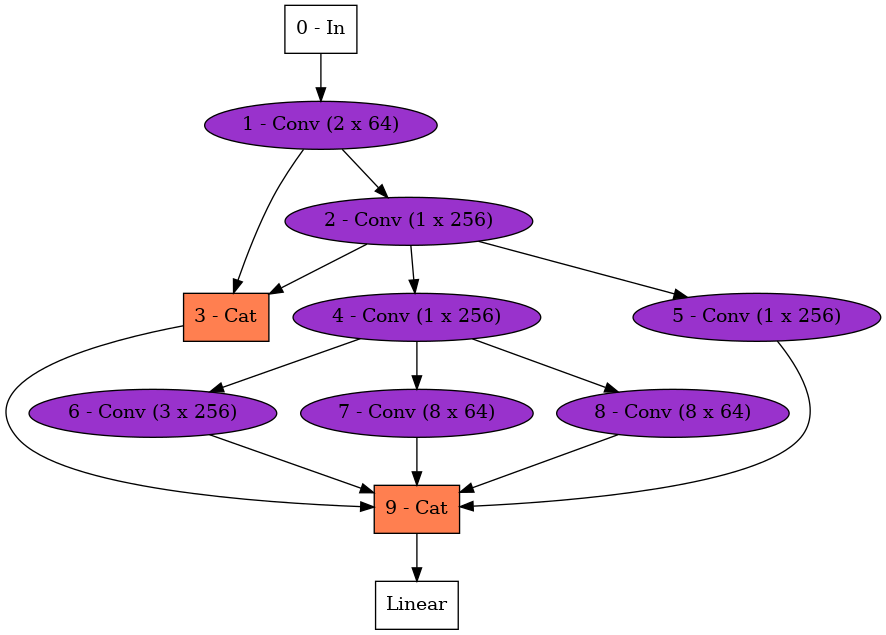

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


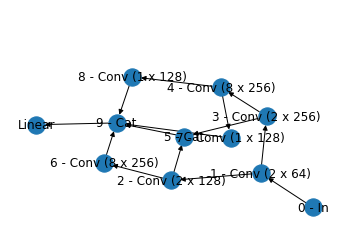

Saving rendered graph to disk.


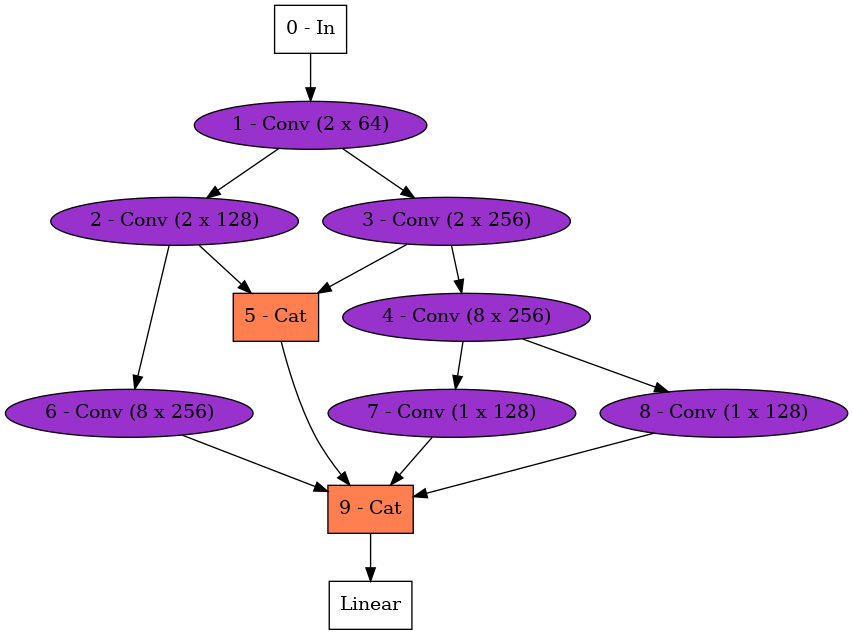

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


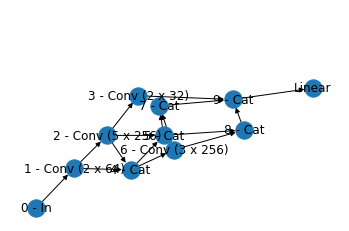

Saving rendered graph to disk.


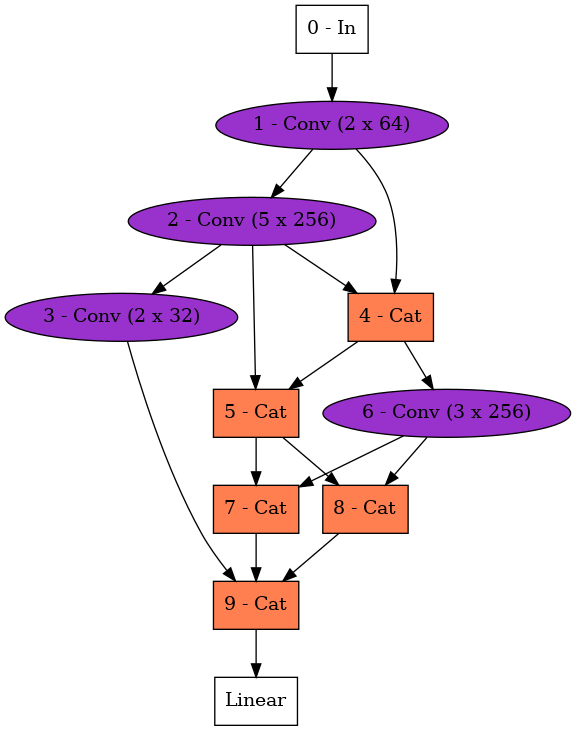

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


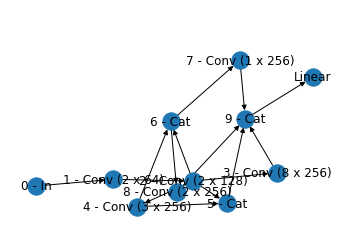

Saving rendered graph to disk.


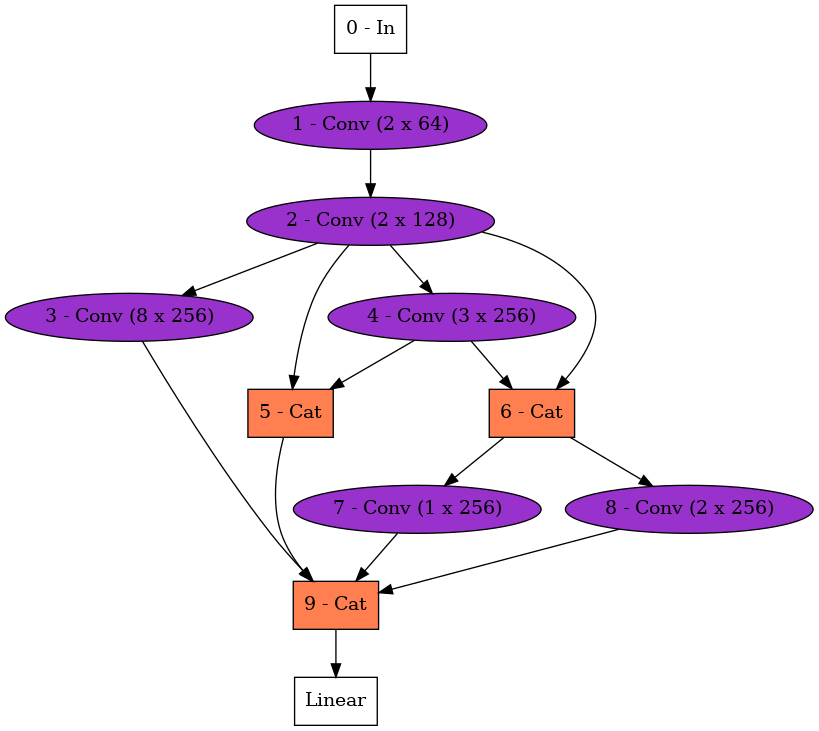

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


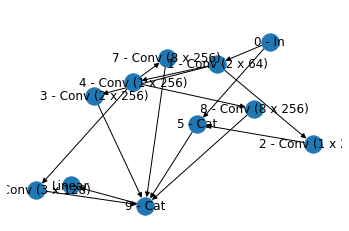

Saving rendered graph to disk.


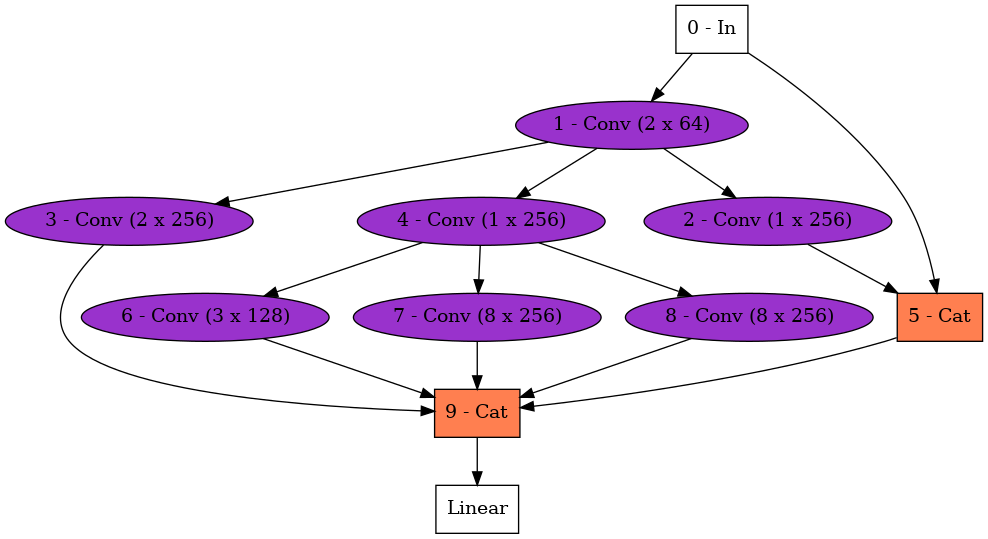

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


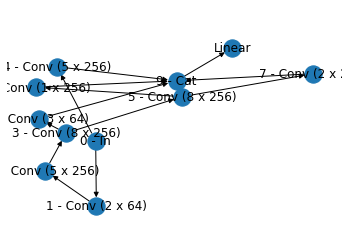

Saving rendered graph to disk.


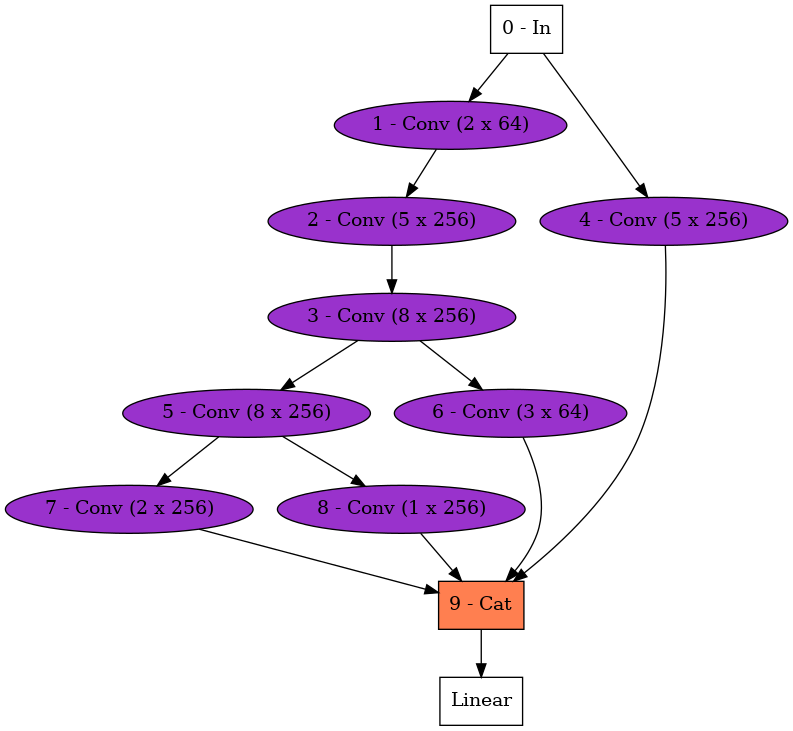

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


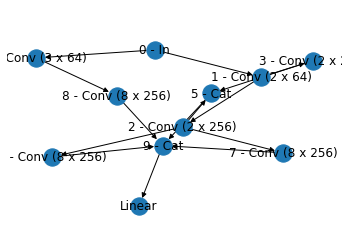

Saving rendered graph to disk.


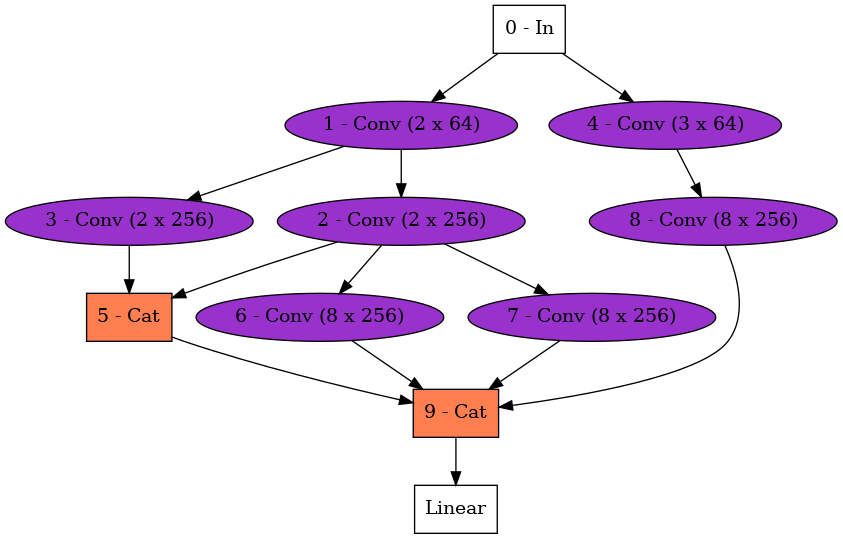

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [None None None]]

 [[(0.873, 0.8771987579670539, 0

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


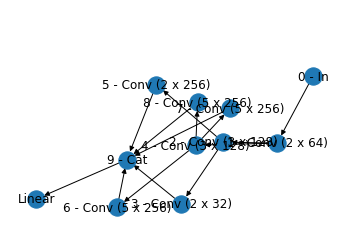

Saving rendered graph to disk.


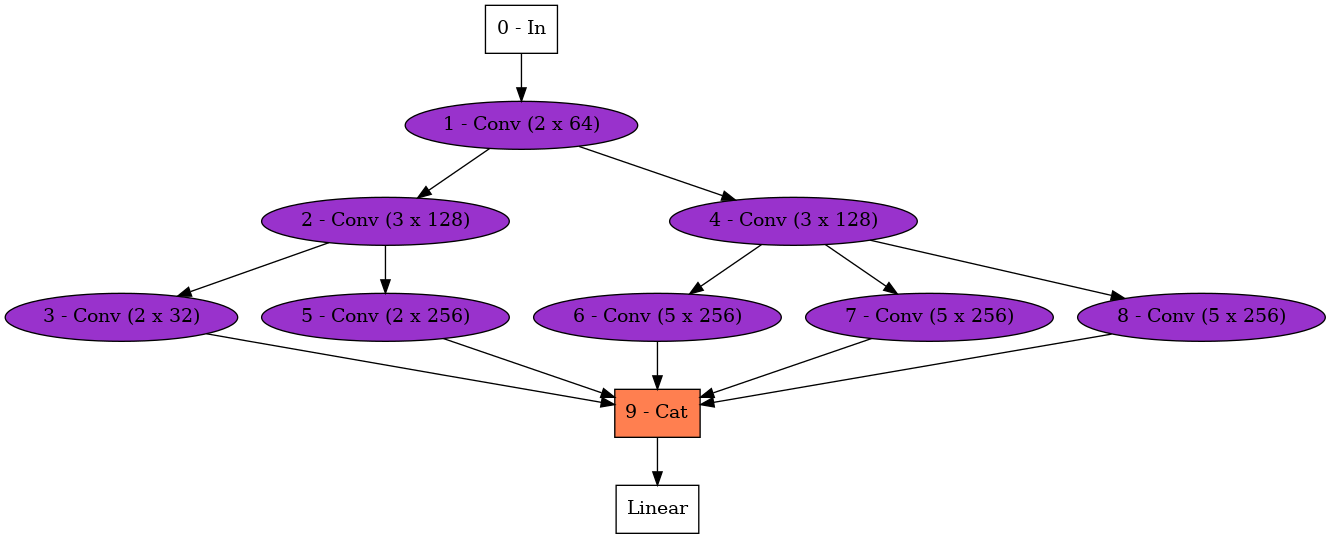

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [(0.8928857142857143, 0.8949858455063252, 0.6039993

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


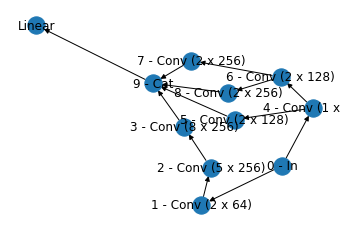

Saving rendered graph to disk.


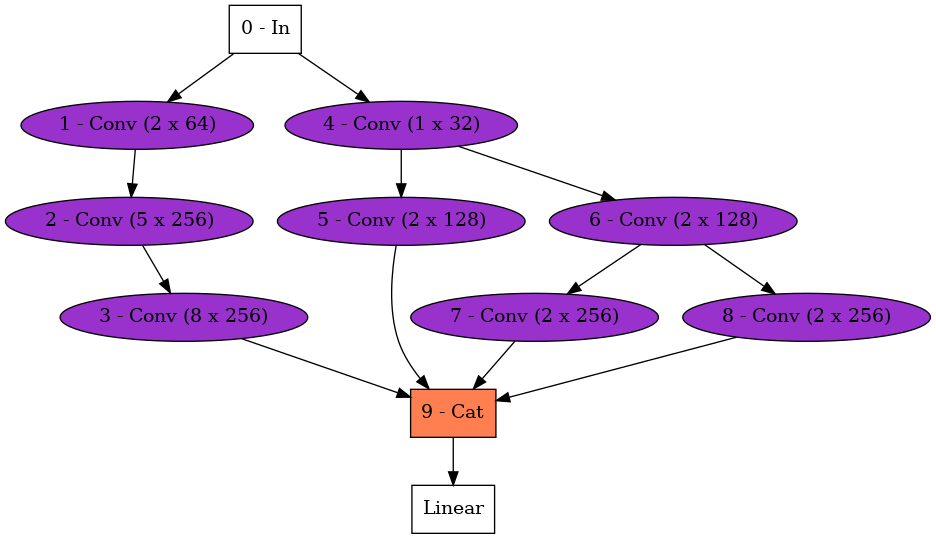

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [(0.8928857142857143, 0.8949858455063252, 0.6039993

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


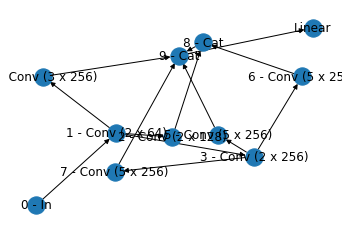

Saving rendered graph to disk.


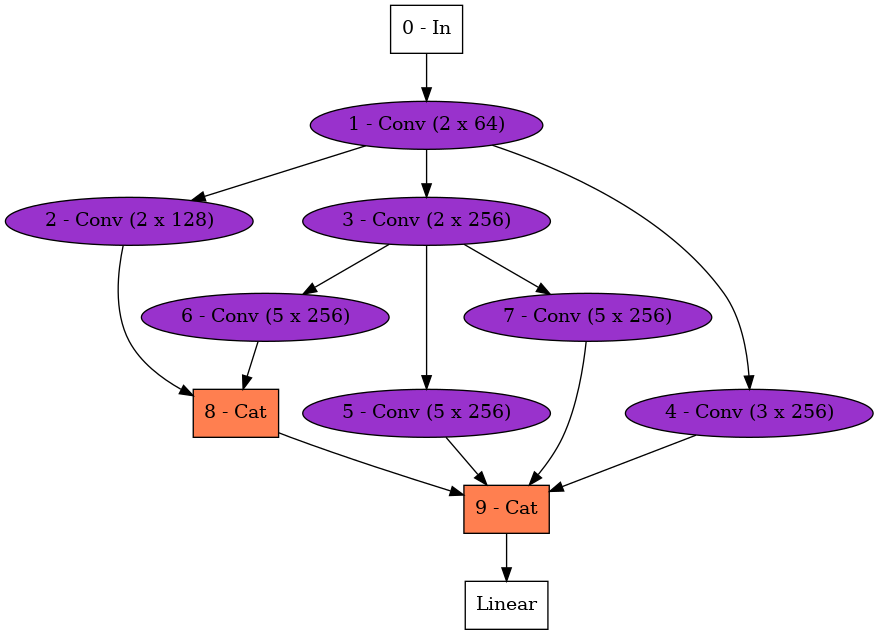

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [(0.8928857142857143, 0.8949858455063252, 0.6039993

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


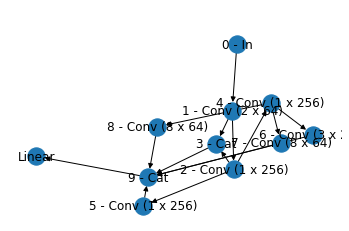

Saving rendered graph to disk.


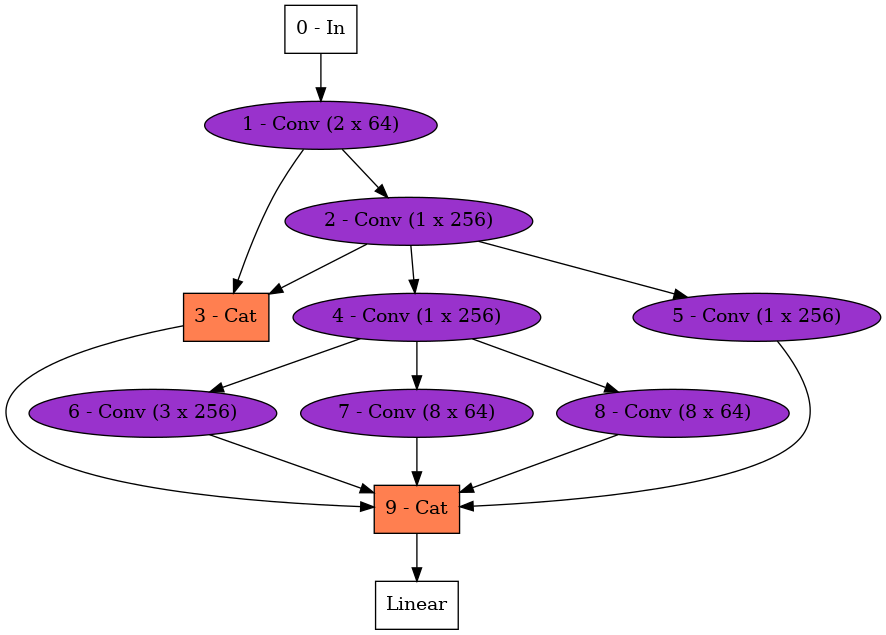

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [(0.8928857142857143, 0.8949858455063252, 0.6039993

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


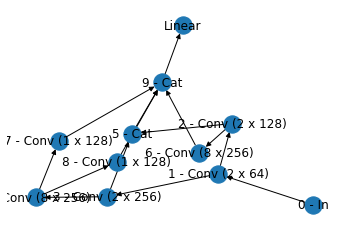

Saving rendered graph to disk.


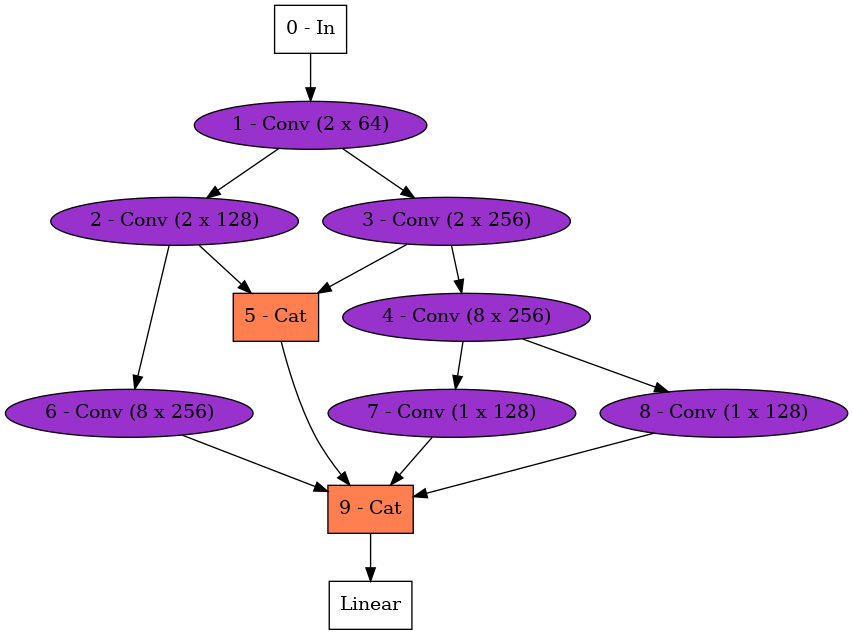

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [(0.8928857142857143, 0.8949858455063252, 0.6039993

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


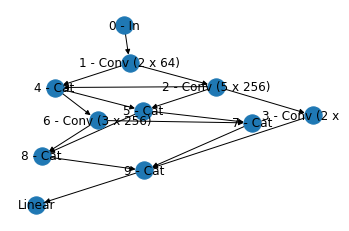

Saving rendered graph to disk.


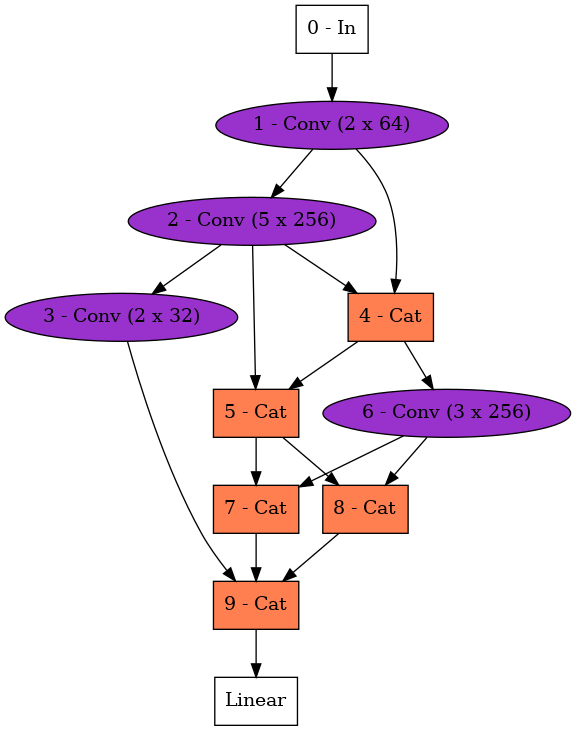

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [(0.8928857142857143, 0.8949858455063252, 0.6039993

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


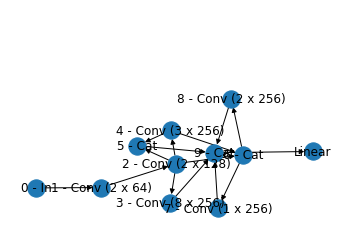

Saving rendered graph to disk.


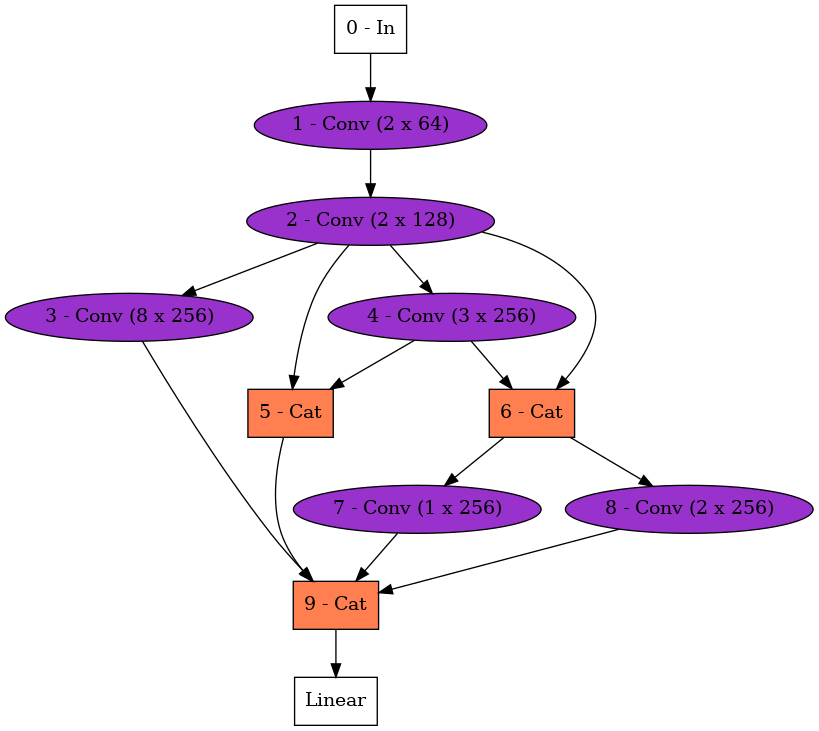

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [(0.8928857142857143, 0.8949858455063252, 0.6039993

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


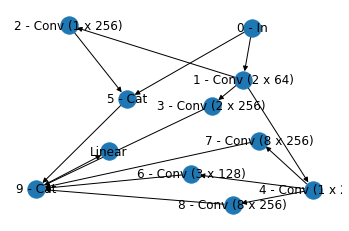

Saving rendered graph to disk.


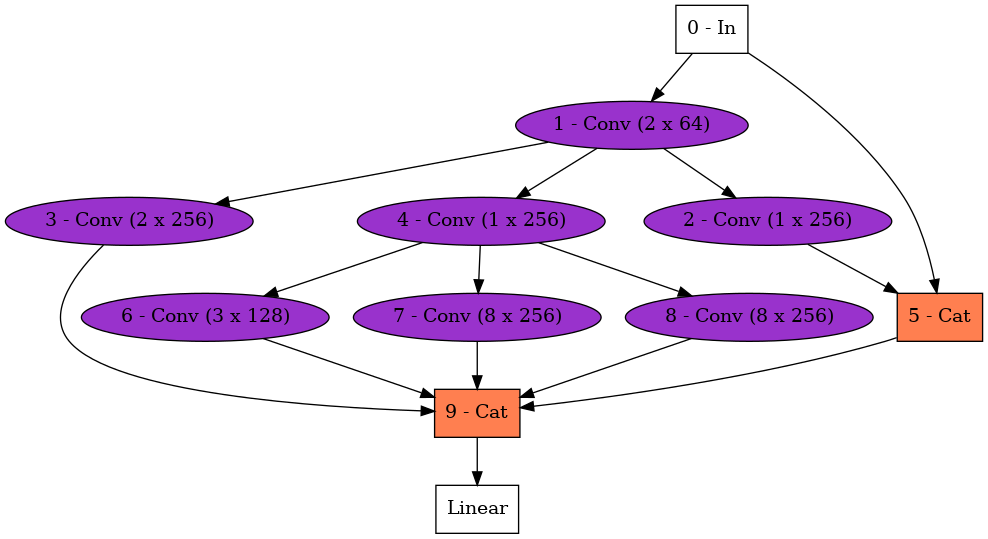

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [(0.8928857142857143, 0.8949858455063252, 0.6039993

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


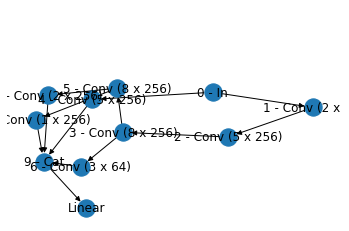

Saving rendered graph to disk.


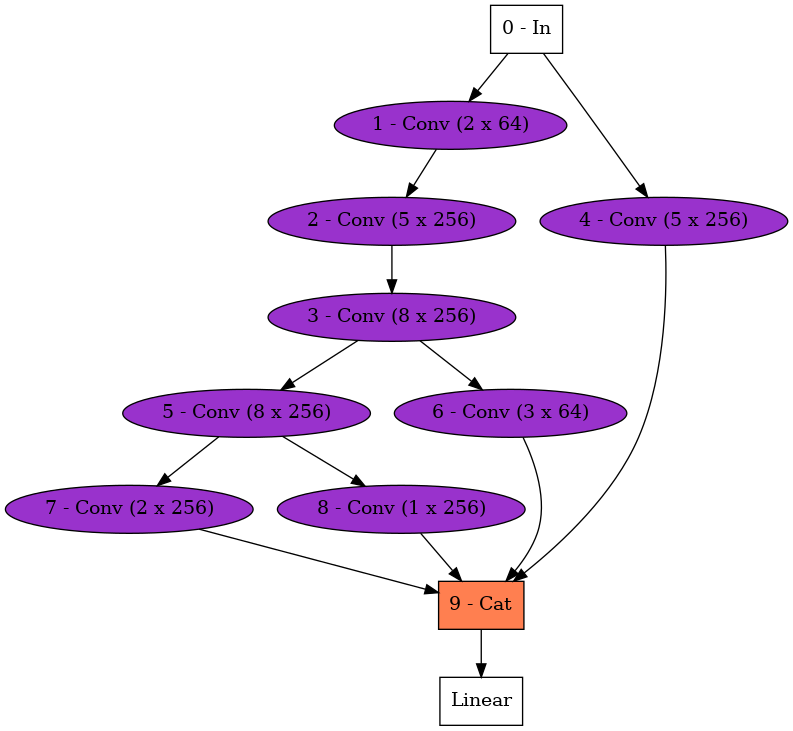

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [(0.8928857142857143, 0.8949858455063252, 0.6039993

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


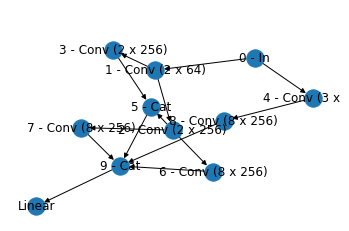

Saving rendered graph to disk.


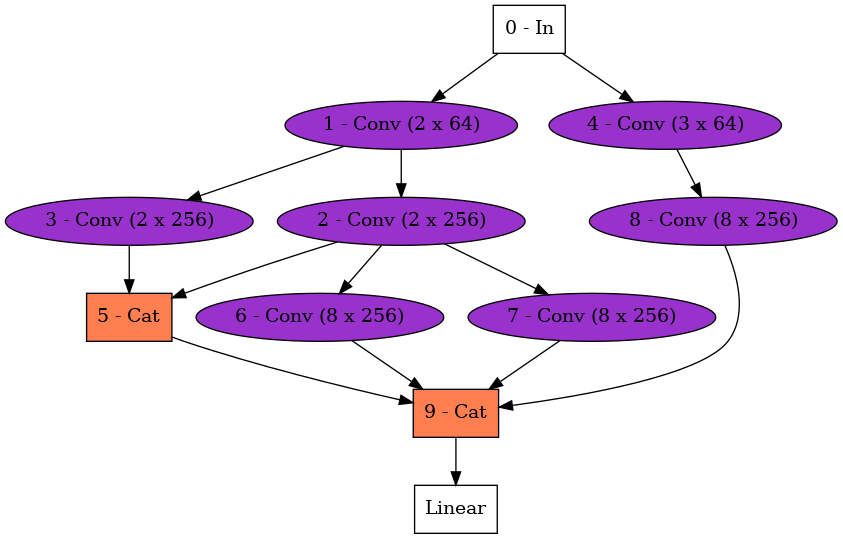

Got (32748, 113) samples from /home/lloyd/NAS/data/all_test_data_0
Got (31826, 113) samples from /home/lloyd/NAS/data/all_test_data_1
Got (27681, 113) samples from /home/lloyd/NAS/data/all_test_data_2
Got (26495, 113) samples from /home/lloyd/NAS/data/all_test_data_3
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
Testing set statistics:
18 classes with distribution [12371    84   143    89   124   340   233   144   118    57    66    60
    40    98    89   149   475   158]
[[[(0.8899857142857143, 0.8927202061400737, 0.6116219140419671)
   24182528.0 1.471641]
  [(0.8950857142857143, 0.8957523186692777, 0.6164830414730306)
   24182528.0 1.47395]
  [(0.8977714285714286, 0.8991639694943493, 0.6300127114593511)
   24182528.0 1.474413]
  [(0.8933142857142857, 0.8946614723778689, 0.6111523100379785)
   24182528.0 1.478237]
  [(0.8928857142857143, 0.8949858455063252, 0.6039993

<ipython-input-105-d1ff222f3b5e>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(np.array([criteria, flops, inftime]).T)


In [105]:
criteria = [[None for i in range(10)] for _ in range(5)]
inftime = [[None for i in range(10)] for _ in range(5)]
density = [[None for i in range(10)] for _ in range(5)]
flops = [[None for i in range(10)] for _ in range(5)]
targets = [[None for i in range(10)] for _ in range(5)]
pred = [[None for i in range(10)] for _ in range(5)]

for j in range(5):
    for i in range(10):
        model = [obj for obj in results_sorted.tail(10).index[i]]
#         model = [obj for obj in results_sorted.tail(2).iloc[i]['Model Specification']]
        model = env.get_spec(model)
        env.render(model, ftype='png')
        display(Image(filename='output.png'))
        try:
            criteria[j][i], inftime[j][i], density[j][i], flops[j][i], targets[j][i], pred[j][i] = env.test(model, verbosity='silent')
        except RuntimeError:
            criteria[j][i], inftime[j][i], density[j][i], flops[j][i], targets[j][i], pred[j][i] = 0,0,0,0,0,0
        print(np.array([criteria, flops, inftime]).T)

Best of the top ten models, averaged over five train/test runs
F1 score: 0.898 +/- 0.001
Macro F1 score: 0.624 +/- 0.005
Accuracy score: 0.897 +/- 0.002
n. FLOPs: 40729280.000 +/- 0.000
Inf time: 1.668 +/- 0.045
Model structure below


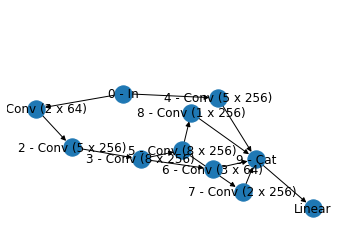

Saving rendered graph to disk.


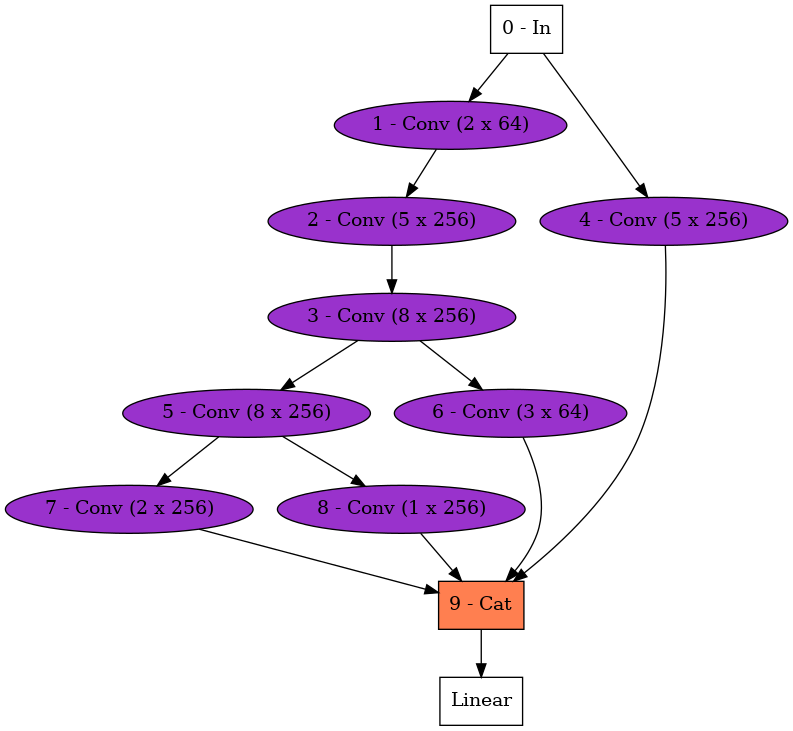

In [106]:
print('Best of the top ten models, averaged over five train/test runs')
avgf1s = [np.mean(row) for row in np.array(criteria).T[1]]
stdf1s = [np.std(row) for row in np.array(criteria).T[1]]
maxind = np.argmax(avgf1s)
print('F1 score: {:.3f} +/- {:.3f}'.format(avgf1s[maxind],stdf1s[maxind]))
avgmf1s = [np.mean(row) for row in np.array(criteria).T[2]]
stdmf1s = [np.std(row) for row in np.array(criteria).T[2]]
print('Macro F1 score: {:.3f} +/- {:.3f}'.format(avgmf1s[maxind],stdmf1s[maxind]))
avgaccs = [np.mean(row) for row in np.array(criteria).T[0]]
stdaccs = [np.std(row) for row in np.array(criteria).T[0]]
print('Accuracy score: {:.3f} +/- {:.3f}'.format(avgaccs[maxind],stdaccs[maxind]))
avgflops = [np.mean(row) for row in np.array(flops).T]
stdflops = [np.std(row) for row in np.array(flops).T]
print('n. FLOPs: {:.3f} +/- {:.3f}'.format(avgflops[maxind], stdflops[maxind]))
avginftimes = [np.mean(row) for row in np.array(inftime).T]
stdinftimes = [np.std(row) for row in np.array(inftime).T]
print('Inf time: {:.3f} +/- {:.3f}'.format(avginftimes[maxind], stdinftimes[maxind]))


print('Model structure below')
best_spec = [obj for obj in results_sorted.tail(10).index[maxind]]
best_model = env.get_spec(best_spec)
env.render(best_model)
Image('output.png')

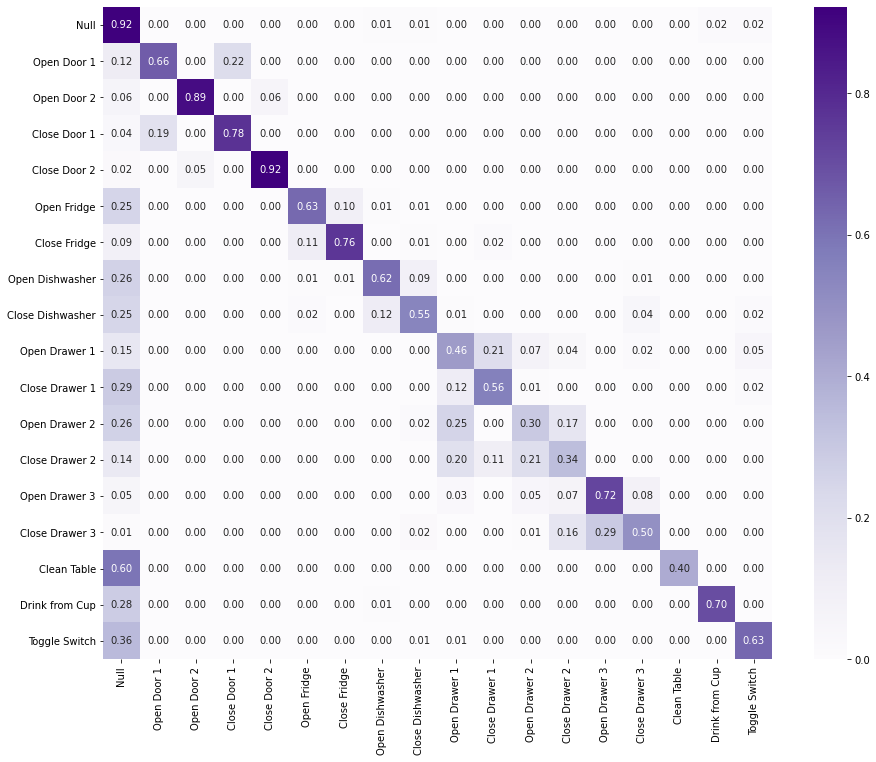

              precision    recall  f1-score   support

           0       0.95      0.92      0.94     58351
           1       0.60      0.66      0.63       399
           2       0.87      0.89      0.88       693
           3       0.56      0.78      0.65       393
           4       0.84      0.92      0.88       567
           5       0.70      0.63      0.66      1594
           6       0.69      0.76      0.73      1097
           7       0.43      0.62      0.51       666
           8       0.27      0.55      0.36       576
           9       0.36      0.46      0.40       272
          10       0.45      0.56      0.50       310
          11       0.39      0.30      0.34       281
          12       0.23      0.34      0.27       183
          13       0.53      0.72      0.61       456
          14       0.53      0.50      0.52       413
          15       0.69      0.40      0.51       708
          16       0.64      0.70      0.67      2279
          17       0.32    

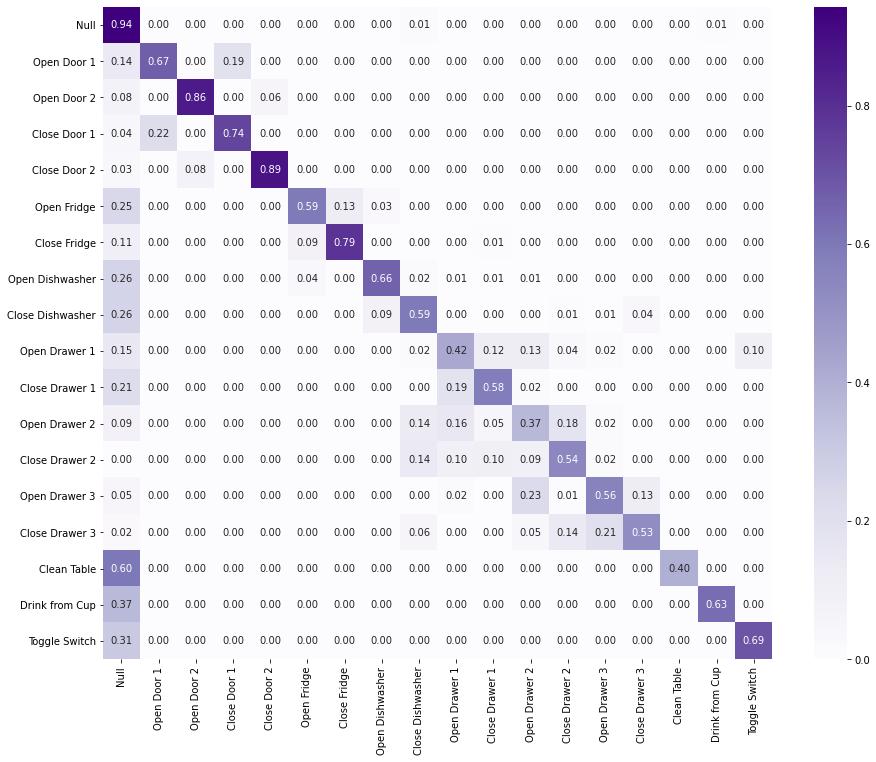

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     58346
           1       0.64      0.67      0.66       399
           2       0.87      0.86      0.87       686
           3       0.57      0.74      0.64       426
           4       0.86      0.89      0.87       589
           5       0.70      0.59      0.64      1589
           6       0.69      0.79      0.74      1105
           7       0.56      0.66      0.61       702
           8       0.25      0.59      0.35       548
           9       0.37      0.42      0.40       278
          10       0.51      0.58      0.54       321
          11       0.30      0.37      0.33       277
          12       0.39      0.54      0.46       184
          13       0.56      0.56      0.56       455
          14       0.50      0.53      0.51       419
          15       0.69      0.40      0.51       691
          16       0.68      0.63      0.66      2232
          17       0.71    

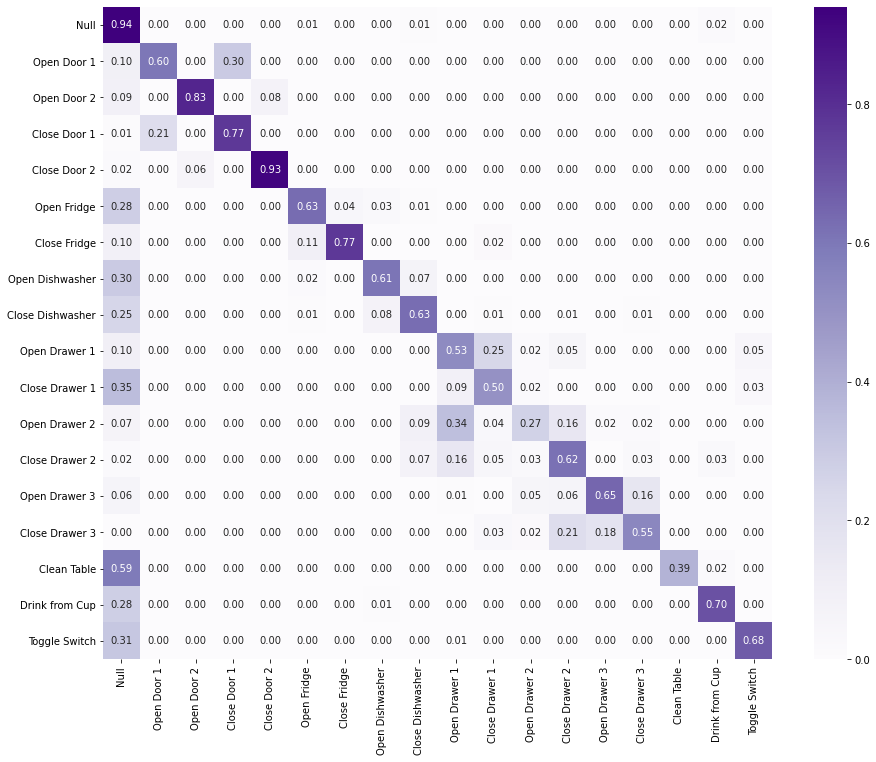

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     58253
           1       0.55      0.60      0.58       408
           2       0.91      0.83      0.87       666
           3       0.59      0.77      0.67       417
           4       0.82      0.93      0.87       598
           5       0.67      0.63      0.65      1616
           6       0.76      0.77      0.76      1114
           7       0.57      0.61      0.59       695
           8       0.27      0.63      0.38       562
           9       0.43      0.53      0.48       280
          10       0.40      0.50      0.45       313
          11       0.56      0.27      0.36       282
          12       0.31      0.62      0.41       189
          13       0.68      0.65      0.66       463
          14       0.52      0.55      0.53       416
          15       0.91      0.39      0.54       705
          16       0.63      0.70      0.66      2272
          17       0.71    

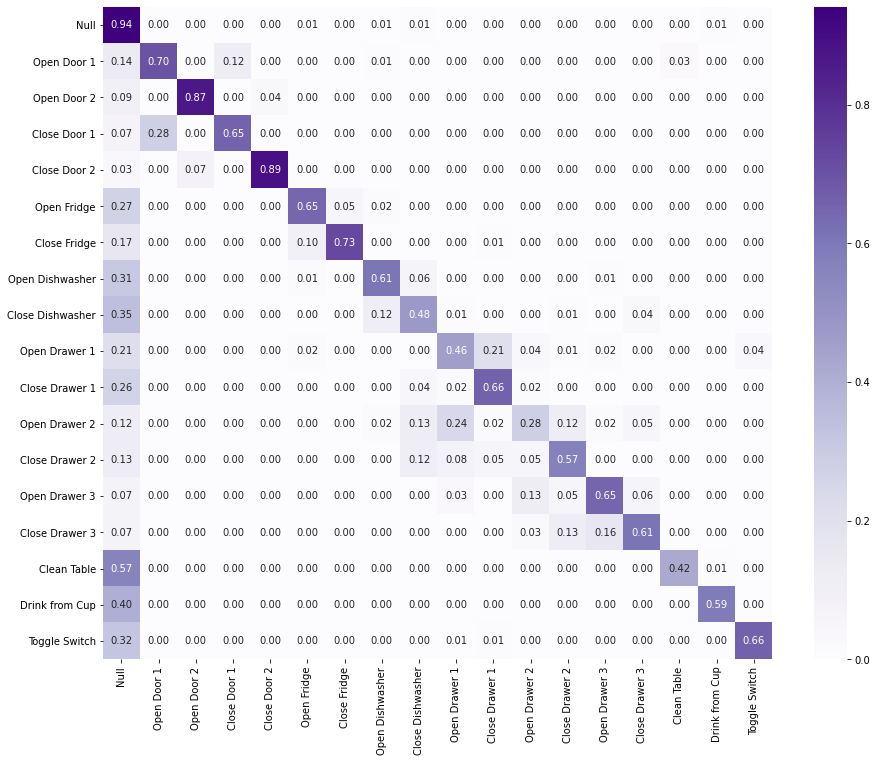

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     58369
           1       0.62      0.70      0.66       395
           2       0.88      0.87      0.87       675
           3       0.59      0.65      0.62       420
           4       0.82      0.89      0.85       574
           5       0.68      0.65      0.66      1610
           6       0.74      0.73      0.73      1113
           7       0.46      0.61      0.52       674
           8       0.26      0.48      0.33       550
           9       0.41      0.46      0.43       274
          10       0.58      0.66      0.62       315
          11       0.42      0.28      0.34       288
          12       0.37      0.57      0.45       191
          13       0.65      0.65      0.65       464
          14       0.53      0.61      0.57       414
          15       0.76      0.42      0.54       714
          16       0.61      0.59      0.60      2214
          17       0.71    

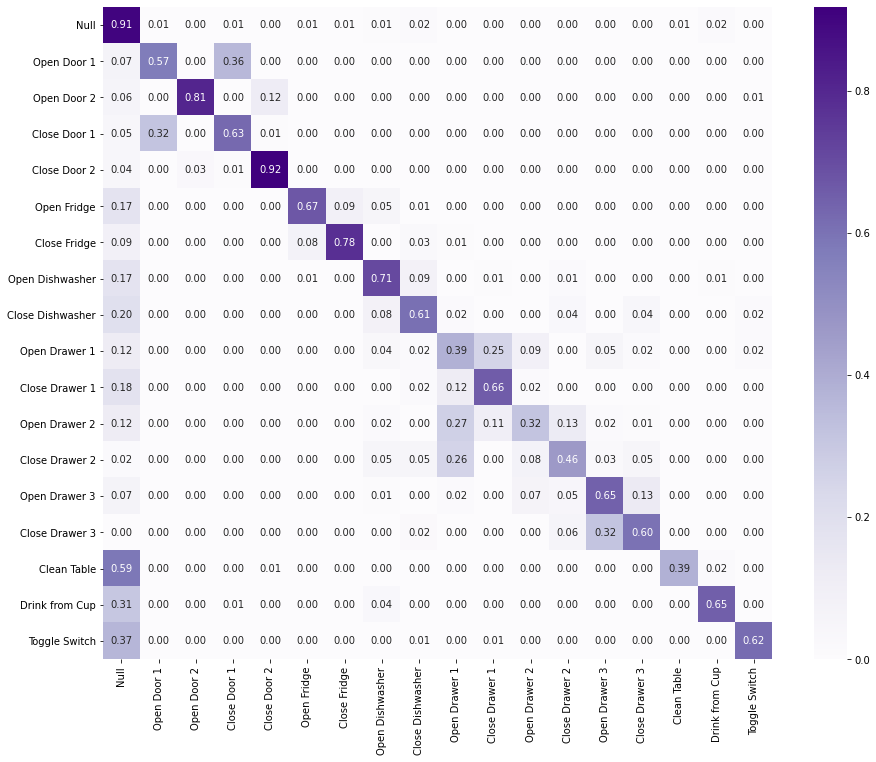

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     58324
           1       0.35      0.57      0.43       406
           2       0.83      0.81      0.82       693
           3       0.34      0.63      0.44       417
           4       0.70      0.92      0.80       574
           5       0.70      0.67      0.69      1626
           6       0.65      0.78      0.71      1078
           7       0.37      0.71      0.49       693
           8       0.24      0.61      0.34       558
           9       0.24      0.39      0.29       269
          10       0.41      0.66      0.51       296
          11       0.44      0.32      0.37       283
          12       0.36      0.46      0.40       192
          13       0.50      0.65      0.57       463
          14       0.49      0.60      0.54       427
          15       0.43      0.39      0.41       701
          16       0.55      0.65      0.60      2248
          17       0.69    

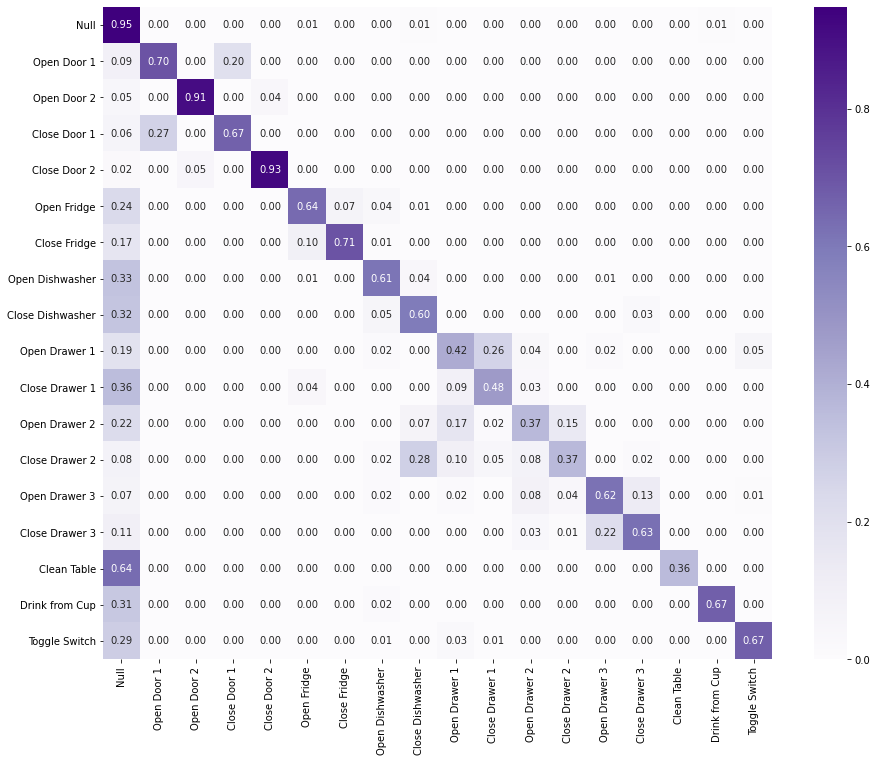

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     58337
           1       0.56      0.70      0.62       403
           2       0.88      0.91      0.90       670
           3       0.67      0.67      0.67       415
           4       0.87      0.93      0.90       587
           5       0.66      0.64      0.65      1589
           6       0.75      0.71      0.73      1100
           7       0.50      0.61      0.55       685
           8       0.31      0.60      0.41       546
           9       0.38      0.42      0.40       265
          10       0.53      0.48      0.50       321
          11       0.48      0.37      0.42       285
          12       0.41      0.37      0.39       187
          13       0.63      0.62      0.63       475
          14       0.52      0.63      0.57       429
          15       0.81      0.36      0.50       704
          16       0.68      0.67      0.67      2263
          17       0.73    

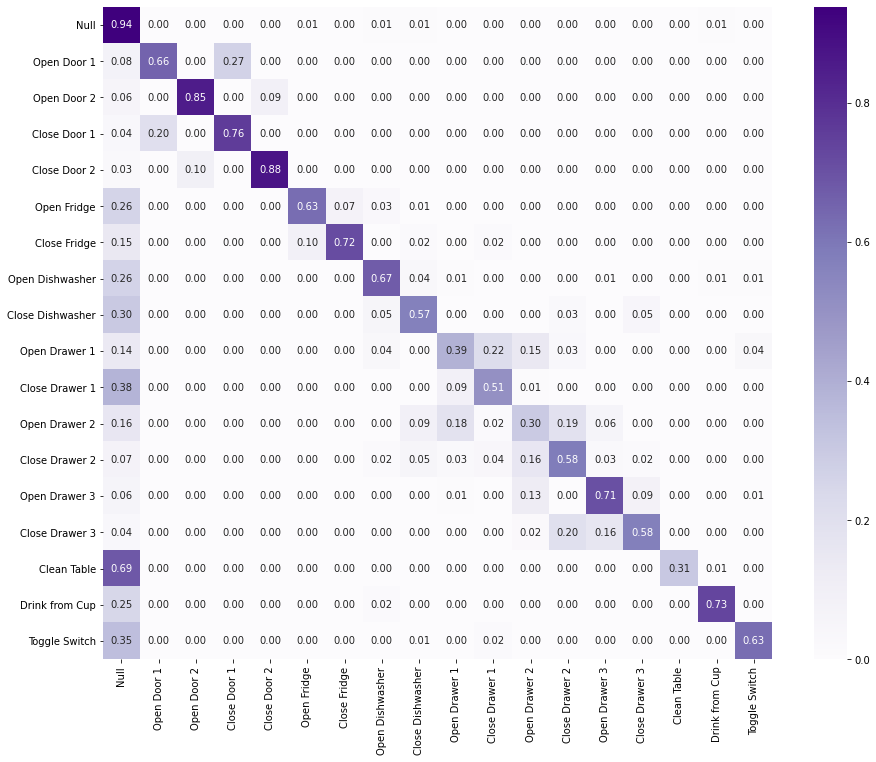

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     58292
           1       0.55      0.66      0.60       410
           2       0.85      0.85      0.85       684
           3       0.61      0.76      0.68       416
           4       0.78      0.88      0.83       568
           5       0.67      0.63      0.65      1633
           6       0.75      0.72      0.73      1124
           7       0.44      0.67      0.53       674
           8       0.32      0.57      0.41       562
           9       0.44      0.39      0.41       272
          10       0.43      0.51      0.47       320
          11       0.34      0.30      0.32       282
          12       0.33      0.58      0.42       187
          13       0.61      0.71      0.65       454
          14       0.54      0.58      0.56       419
          15       0.77      0.31      0.44       702
          16       0.66      0.73      0.70      2254
          17       0.61    

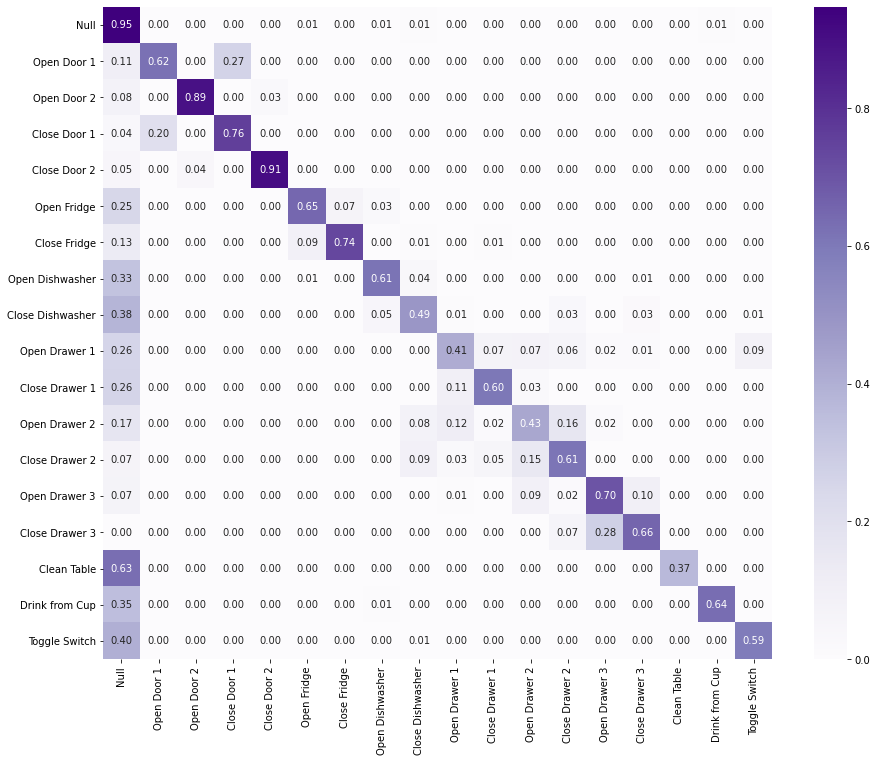

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     58366
           1       0.57      0.62      0.60       400
           2       0.90      0.89      0.90       677
           3       0.62      0.76      0.68       411
           4       0.85      0.91      0.88       593
           5       0.69      0.65      0.67      1627
           6       0.75      0.74      0.74      1089
           7       0.48      0.61      0.54       688
           8       0.30      0.49      0.37       550
           9       0.44      0.41      0.42       267
          10       0.74      0.60      0.67       311
          11       0.53      0.43      0.48       291
          12       0.37      0.61      0.46       191
          13       0.60      0.70      0.64       447
          14       0.53      0.66      0.59       414
          15       0.79      0.37      0.50       689
          16       0.67      0.64      0.65      2260
          17       0.73    

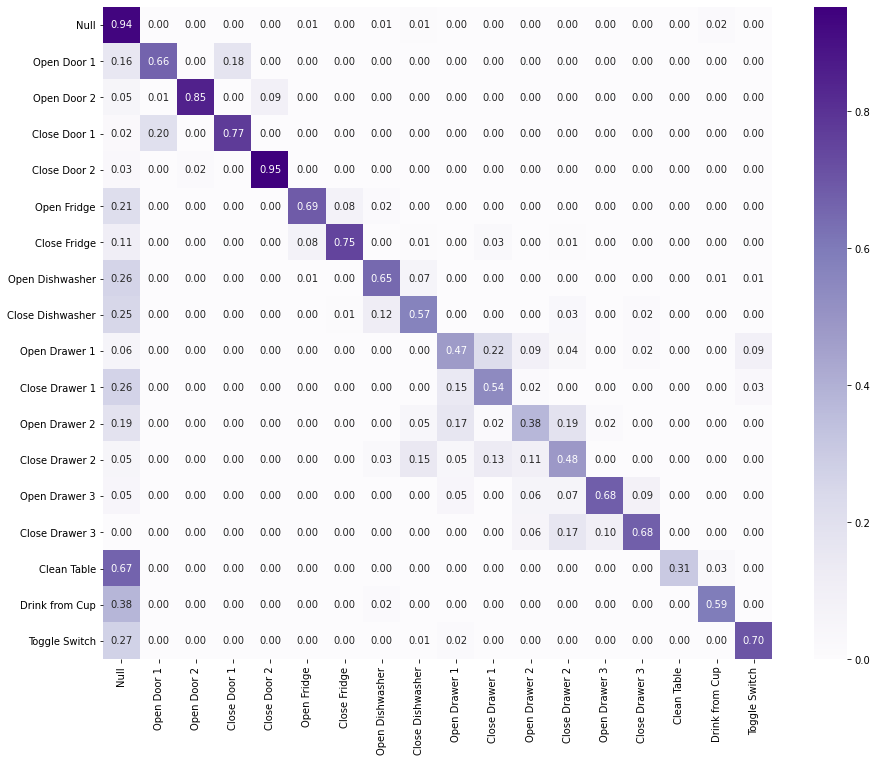

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     58313
           1       0.56      0.66      0.61       397
           2       0.90      0.85      0.88       688
           3       0.66      0.77      0.71       421
           4       0.79      0.95      0.86       590
           5       0.72      0.69      0.71      1614
           6       0.76      0.75      0.75      1112
           7       0.49      0.65      0.56       677
           8       0.27      0.57      0.37       559
           9       0.35      0.47      0.40       268
          10       0.45      0.54      0.49       299
          11       0.46      0.38      0.41       287
          12       0.26      0.48      0.34       188
          13       0.74      0.68      0.71       450
          14       0.61      0.68      0.64       422
          15       0.81      0.31      0.44       705
          16       0.56      0.59      0.58      2255
          17       0.62    

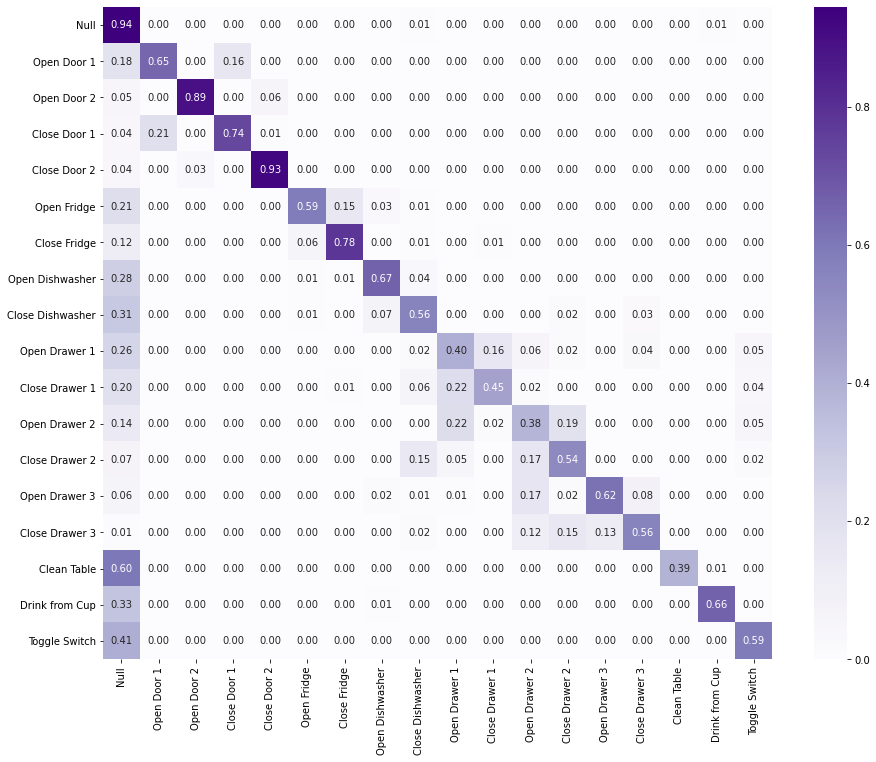

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     58354
           1       0.54      0.65      0.59       406
           2       0.92      0.89      0.91       698
           3       0.64      0.74      0.68       420
           4       0.83      0.93      0.87       601
           5       0.72      0.59      0.65      1598
           6       0.63      0.78      0.70      1095
           7       0.53      0.67      0.59       676
           8       0.31      0.56      0.40       547
           9       0.34      0.40      0.37       268
          10       0.46      0.45      0.46       309
          11       0.34      0.38      0.36       288
          12       0.35      0.54      0.43       192
          13       0.72      0.62      0.67       460
          14       0.54      0.56      0.55       422
          15       0.74      0.39      0.51       724
          16       0.65      0.66      0.66      2228
          17       0.66    

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
from seaborn import heatmap
opp_class_names = ['Null','Open Door 1','Open Door 2','Close Door 1','Close Door 2','Open Fridge',
'Close Fridge','Open Dishwasher','Close Dishwasher','Open Drawer 1','Close Drawer 1','Open Drawer 2','Close Drawer 2',
'Open Drawer 3','Close Drawer 3','Clean Table','Drink from Cup','Toggle Switch']
for i in range(10):
    mat = confusion_matrix(targets[i],pred[i], normalize='true')
    df_cm = pd.DataFrame(mat, index=opp_class_names,columns=opp_class_names)
    plt.figure(10,figsize=(15,12))
    heatmap(df_cm,annot=True,fmt='.2f',cmap='Purples')
    plt.show()

    print(classification_report(targets[i],pred[i]))


In [ ]:
print(results_sorted.tail(10)['Redef_rewards'].values)

In [21]:
def generate_best_arch(agent, env):
    best_model = [(0,0,0,0,0,0)]
    done = False
    state = env.reset()
    score = 0
    while not done:
        agent.epsilon = 0
        agent.episode_counter = 0
        action = agent.act(state)
        print(action)
    # If action is valid, step the env, otherwise discard and gen another layer
        if env.action_to_nsc(action).valid():
            best_model.append(env.action_to_nsc(action).tuple)
            next_state, reward, done, _ = env.step(action, eval=False)
            agent.step(state, action, reward, next_state, done)
            state = next_state
    return best_model
    

In [ ]:

best_model = generate_best_arch(Agent, env)
best_model = env.get_spec(best_model) 


NameError: name 'Agent' is not defined

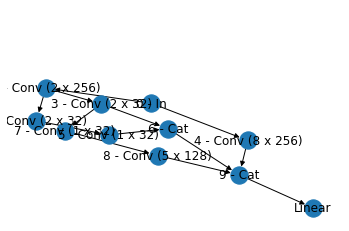

Saving rendered graph to disk.


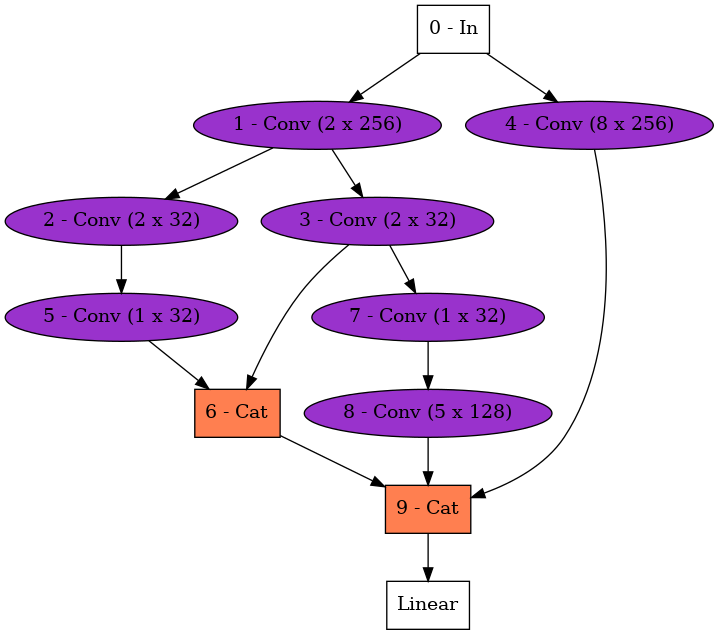

In [18]:

env.render(best_model, ftype='png')
from IPython.display import Image
Image(filename='output.png')

In [19]:
criteria, inftime, density, flops, targets, pred = env.test(best_model)

Testing NASNet(
  (final_cat): Cat()
  (lstm): LSTM(448, 128, num_layers=2, batch_first=True)
  (output): Linear(in_features=128, out_features=18, bias=True)
  (module_list): ModuleList(
    (0): BNConvReLU(
      (conv): Conv1d(113, 256, kernel_size=(2,), stride=(1,), padding=(1,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BNConvReLU(
      (conv): Conv1d(113, 256, kernel_size=(8,), stride=(1,), padding=(4,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): BNConvReLU(
      (conv): Conv1d(256, 32, kernel_size=(2,), stride=(1,), padding=(1,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): BNConvReLU(
      (conv): Conv1d(256, 32, kernel_size=(2,), stride=(1,), padding=(1,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(32, eps=1e-05, momentum

In [20]:
print(criteria)

(0.8766714285714285, 0.8861239393218766, 0.6132378198659194)


In [7]:
deepconvcrit = [[] for i in range(5)]
deepconv = ((0,0,0,0,0,0),(1,1,5,0,0,64),(2,1,5,1,0,64),(3,1,5,2,0,64),(4,1,5,3,0,64),(5,4,0,0,0,0))
deepconv = env.get_spec(deepconv)
for i in range(5):
    criteria, inftime, density, flops, targets, pred = env.test(deepconv)
    deepconvcrit[i] = [criteria, flops, inftime]
    print(criteria, flops, inftime)

Testing NASNet(
  (lstm): LSTM(64, 128, num_layers=2, batch_first=True)
  (output): Linear(in_features=128, out_features=18, bias=True)
  (module_list): ModuleList(
    (0): BNConvReLU(
      (conv): Conv1d(113, 64, kernel_size=(5,), stride=(1,), padding=(2,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BNConvReLU(
      (conv): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): BNConvReLU(
      (conv): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): BNConvReLU(
      (conv): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [8]:
maxffcrit = [[] for i in range(5)]
maxff = ((0,0,0,0,0,0),(1,1,5,0,0,256),(2,1,5,1,0,256),(3,1,5,2,0,256),(4,1,5,3,0,256),(5,1,5,4,0,256),(6,1,5,5,0,256),(7,1,5,6,0,256),(8,1,5,7,0,256),(9,4,0,0,0,0))
maxff = env.get_spec(maxff)
for i in range(5):
    criteria, inftime, density, flops, targets, pred = env.test(maxff)
    maxffcrit[i] = [criteria, flops, inftime]
    print(criteria, flops, inftime)

Testing NASNet(
  (lstm): LSTM(256, 128, num_layers=2, batch_first=True)
  (output): Linear(in_features=128, out_features=18, bias=True)
  (module_list): ModuleList(
    (0): BNConvReLU(
      (conv): Conv1d(113, 256, kernel_size=(5,), stride=(1,), padding=(2,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BNConvReLU(
      (conv): Conv1d(256, 256, kernel_size=(5,), stride=(1,), padding=(2,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): BNConvReLU(
      (conv): Conv1d(256, 256, kernel_size=(5,), stride=(1,), padding=(2,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): BNConvReLU(
      (conv): Conv1d(256, 256, kernel_size=(5,), stride=(1,), padding=(2,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True

In [9]:
maxwidecrit = [[] for i in range(5)]
maxwide = ((0,0,0,0,0,0),(1,1,5,0,0,256),(2,1,5,0,0,256),(3,1,5,0,0,256),(4,1,5,0,0,256),(5,1,5,0,0,256),(6,1,5,0,0,256),(7,1,5,0,0,256),(8,1,5,0,0,256),(9,4,0,0,0,0))
maxwide = env.get_spec(maxwide)
for i in range(5):
    criteria, inftime, density, flops, targets, pred = env.test(maxwide)
    maxwidecrit[i] = [criteria, flops, inftime]
    print(criteria, flops, inftime)

Testing NASNet(
  (final_cat): Cat()
  (lstm): LSTM(2048, 128, num_layers=2, batch_first=True)
  (output): Linear(in_features=128, out_features=18, bias=True)
  (module_list): ModuleList(
    (0): BNConvReLU(
      (conv): Conv1d(113, 256, kernel_size=(5,), stride=(1,), padding=(2,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BNConvReLU(
      (conv): Conv1d(113, 256, kernel_size=(5,), stride=(1,), padding=(2,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): BNConvReLU(
      (conv): Conv1d(113, 256, kernel_size=(5,), stride=(1,), padding=(2,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): BNConvReLU(
      (conv): Conv1d(113, 256, kernel_size=(5,), stride=(1,), padding=(2,))
      (ReLU): ReLU()
      (BN): BatchNorm1d(256, eps=1e-05, mom

In [ ]:
results.to_pickle('search_results_baseline_5.pkl')

In [10]:
print('Average of {} train/test runs'.format(len(deepconvcrit)))
print('DeepConv ')
print('F1 score: {:.3f} +/- {:.3f}'.format(np.mean([crit[0][1] for crit in deepconvcrit]),np.std([crit[0][1] for crit in deepconvcrit])))
print('Macro F1 score: {:.3f} +/- {:.3f}'.format(np.mean([crit[0][2] for crit in deepconvcrit]),np.std([crit[0][2] for crit in deepconvcrit])))
print('Accuracy score: {:.3f} +/- {:.3f}'.format(np.mean([crit[0][0] for crit in deepconvcrit]),np.std([crit[0][0] for crit in deepconvcrit])))
print('n. FLOPs: {:.3f}'.format(np.mean([crit[1] for crit in deepconvcrit])))
print('Inf time: {:.3f} +/- {:.3f}'.format(np.mean([crit[2] for crit in deepconvcrit]), np.std([crit[2] for crit in deepconvcrit])))

print('MaxFF ')
print('F1 score: {:.3f} +/- {:.3f}'.format(np.mean([crit[0][1] for crit in maxffcrit]),np.std([crit[0][1] for crit in maxffcrit])))
print('Macro F1 score: {:.3f} +/- {:.3f}'.format(np.mean([crit[0][2] for crit in maxffcrit]),np.std([crit[0][2] for crit in maxffcrit])))
print('Accuracy score: {:.3f} +/- {:.3f}'.format(np.mean([crit[0][0] for crit in maxffcrit]),np.std([crit[0][0] for crit in maxffcrit])))
print('n. FLOPs: {:.3f}'.format(np.mean([crit[1] for crit in maxffcrit])))
print('Inf time: {:.3f} +/- {:.3f}'.format(np.mean([crit[2] for crit in maxffcrit]), np.std([crit[2] for crit in maxffcrit])))

print('MaxWide ')
print('F1 score: {:.3f} +/- {:.3f}'.format(np.mean([crit[0][1] for crit in maxwidecrit]),np.std([crit[0][1] for crit in maxwidecrit])))
print('Macro F1 score: {:.3f} +/- {:.3f}'.format(np.mean([crit[0][2] for crit in maxwidecrit]),np.std([crit[0][2] for crit in maxwidecrit])))
print('Accuracy score: {:.3f} +/- {:.3f}'.format(np.mean([crit[0][0] for crit in maxwidecrit]),np.std([crit[0][0] for crit in maxwidecrit])))
print('n. FLOPs: {:.3f}'.format(np.mean([crit[1] for crit in maxwidecrit])))
print('Inf time: {:.3f} +/- {:.3f}'.format(np.mean([crit[2] for crit in maxwidecrit]), np.std([crit[2] for crit in maxwidecrit])))

Average of 5 train/test runs
DeepConv 
F1 score: 0.860 +/- 0.005
Macro F1 score: 0.560 +/- 0.020
Accuracy score: 0.843 +/- 0.006
n. FLOPs: 5311744.000
Inf time: 0.938 +/- 0.026
MaxFF 
F1 score: 0.888 +/- 0.003
Macro F1 score: 0.604 +/- 0.012
Accuracy score: 0.882 +/- 0.005
n. FLOPs: 44423424.000
Inf time: 1.885 +/- 0.027
MaxWide 
F1 score: 0.873 +/- 0.002
Macro F1 score: 0.578 +/- 0.005
Accuracy score: 0.859 +/- 0.003
n. FLOPs: 38603008.000
Inf time: 1.849 +/- 0.005


In [98]:
results = pd.read_pickle('MLP 10 eps x 20k/search_results_mlp_10.pkl')

Best of the top ten models, averaged over five train/test runs
F1 score: 0.900 +/- 0.001
n. FLOPs: 47217760.000 +/- 0.000
Inf time: 1.673 +/- 0.002
Model structure below


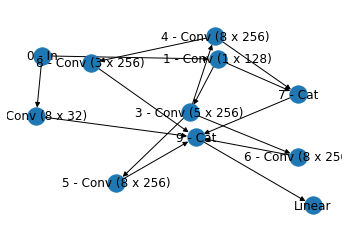

Saving rendered graph to disk.


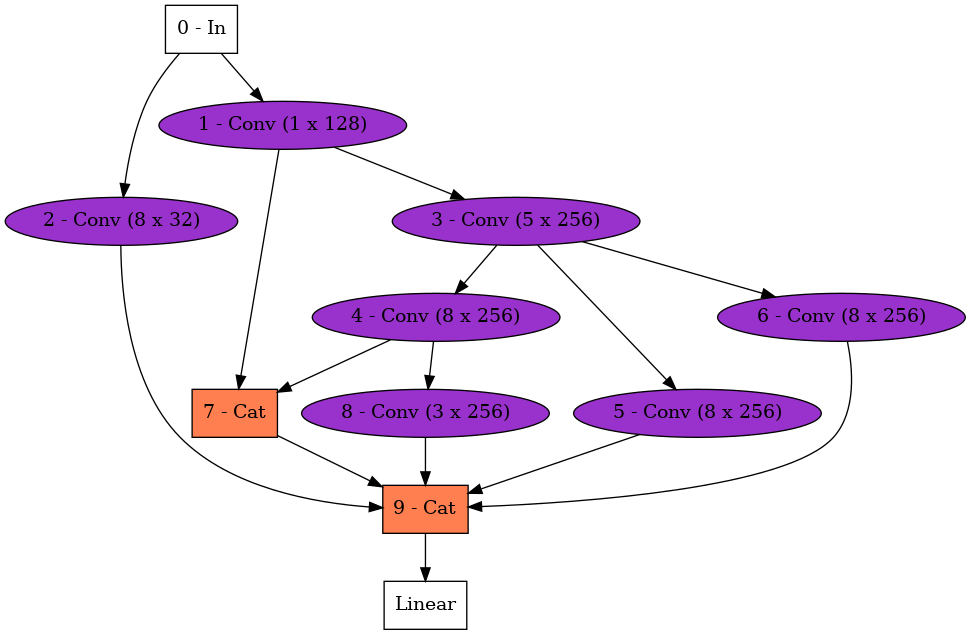

In [92]:
dataset_lstm = pd.read_pickle('dataset_lstm.pkl')
results_sorted = dataset_lstm.sort_values('Testing F1 Score')